# Hand Movement Prediction Using MLP

Import libraries

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.utils import shuffle
import random

In [4]:
#Import and shuffle the data to achieve randomness
data1 = shuffle(pd.read_csv("Summarized_Data.csv").iloc[:,1:17]).reset_index(drop=True)
data1.head(5)

X0         Y0         Z0         X1          Y1         Z1  \
0  100.953911  55.961128 -64.827305  55.895537  162.282295 -11.235967   
1  113.566147  10.119615 -80.509512  90.442881    5.216347 -78.614536   
2   82.991675  37.717783 -48.641430  71.087686   61.890004 -53.845487   
3   74.306212  56.891575 -65.768832  60.768323   93.783658 -24.968925   
4   13.762436  77.700770 -47.506657  72.524665   64.100462 -87.839070   

          X2         Y2         Z2         X3          Y3         Z3  \
0  57.637481  96.730735 -23.867356  65.912781  148.132882 -29.412990   
1  65.451932 -11.751467 -74.293941  62.216747  135.564023 -29.542090   
2  60.857715  10.064146 -71.291010  -6.735708   80.057465 -25.852006   
3  80.659233  82.367063 -62.419194  59.999926   23.149846 -67.692965   
4  35.675513  72.891603 -55.638681  60.669253   -0.167533 -81.447314   

          X4          Y4         Z4  Class  
0  28.711520  162.057805  -3.169111      2  
1  64.036319   84.387480 -34.001731      3  
2  10.214053   87.429040 -25.413020      1  
3  53.441164  138.367110 -29.312795      3  
4  75.321195   37.573999 -88.454059      1

In [5]:
#Get the input cases and output (target class)
y_output = data1['Class']
x_input = data1.iloc[:,0:15]

In [6]:
#Get the classes for each input variables
D1= data1[data1['Class']==1].iloc[:,0:15]
D2= data1[data1['Class']==2].iloc[:,0:15]
D3= data1[data1['Class']==3].iloc[:,0:15]
print ("Class 1 : "+ str(D1.shape[0]),"Class 2: "+ str(D2.shape[0]), "Class 3: "+str(D3.shape[0]) )

Class 1 : 3334 Class 2: 3334 Class 3: 3334


In [7]:
#convert the output to binary code
yy={}
for i in range(10002):
    
    if y_output[i]==1:   
      yy[i]=[0,0,1]
      
    elif y_output[i]==2:
        yy[i]=[0,1,0] 
    else: 
        yy[i]=[1,0,0] 
yyy=pd.DataFrame.from_dict(data=yy,orient='index')

# PART 2 : Selecting 2 tentative sizes (h) for the hidden layer by PCA Analysis

In [8]:
#Convert the data to training and test set
scaler=preprocessing.StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(x_input))
data_train0,data_test0,y_train0,y_test0= train_test_split(scaled_data,y_output,test_size=0.2, random_state=100)
data_train,data_test,y_train,y_test= train_test_split(scaled_data,yyy,test_size=0.2, random_state=100)

In [9]:
D1tr=y_train0[y_train0[:,]==1]
D2tr=y_train0[y_train0[:,]==2]
D3tr=y_train0[y_train0[:,]==3]
D1te=y_test0[y_test0[:,]==1]
D2te=y_test0[y_test0[:,]==2]
D3te=y_test0[y_test0[:,]==3]

In [10]:
print ("Class 1 (training set): "+ str(D1tr.shape[0]),"Class 2 (training set): "+ str(D2tr.shape[0]), "Class 3 (training set): "+str(D3tr.shape[0]) )
print ("Class 1 (test set): "+ str(D1te.shape[0]),"Class 2 (test set): "+ str(D2te.shape[0]), "Class 3 (test set): "+str(D3te.shape[0]) )

Class 1 (training set): 2663 Class 2 (training set): 2668 Class 3 (training set): 2670
Class 1 (test set): 671 Class 2 (test set): 666 Class 3 (test set): 664


In [11]:
data_train.head(5)

0         1         2         3         4         5         6  \
4052 -1.336146 -0.257159 -0.643712  0.583427 -1.197125 -1.588397 -0.021294   
8692 -2.010570 -0.274503 -0.325620  0.506873 -1.271424 -1.632140  0.348953   
2924 -0.432939  0.300219  1.015603 -2.070615  0.446521  1.117696  0.546144   
6898 -0.625425  0.023007  1.217695  0.748327 -0.130835  0.685058  0.100970   
6956  1.040640  1.217523  1.038581  0.775127  0.133373  0.641581  1.460384   

             7         8         9        10        11        12        13  \
4052 -0.318572 -1.177185  0.441127 -0.397363 -1.404148 -0.548382  0.050765   
8692 -0.525397 -1.537614 -0.032760 -0.306715 -1.145190  0.083526 -1.848110   
2924 -0.885026 -0.274203 -0.538472  1.681522  1.318215  0.100322 -1.100273   
6898  0.122157  0.993597  0.908313  1.518679  1.303509  1.314295  1.159047   
6956 -1.090782 -1.727457 -1.478897  0.274607  1.441258 -0.467379  0.731095   

            14  
4052 -0.619290  
8692 -1.291405  
2924 -0.347385  
6898  1.181069  
6956  0.409168

In [12]:
#Standardized the data
data_train_std=StandardScaler().fit_transform(data_train) 
#Covariance matrix
cov_mat1=np.corrcoef(np.transpose(data_train_std))
pd.DataFrame(cov_mat1).head(4)

0         1         2         3         4         5         6  \
0  1.000000 -0.224676 -0.258118  0.127463  0.009750  0.040116  0.099500   
1 -0.224676  1.000000  0.652873  0.003080  0.172088  0.272436 -0.017443   
2 -0.258118  0.652873  1.000000  0.004790  0.273581  0.562019 -0.015688   
3  0.127463  0.003080  0.004790  1.000000 -0.255218 -0.320866  0.126369   

          7         8         9        10        11        12        13  \
0  0.028067  0.037275  0.089045  0.005219  0.035098  0.090791  0.034304   
1  0.141050  0.248165 -0.007446  0.137758  0.222192 -0.004007  0.139862   
2  0.238826  0.532741 -0.030111  0.249039  0.517167 -0.040138  0.248577   
3 -0.011332 -0.027836  0.134523 -0.022943 -0.026786  0.108182  0.014671   

         14  
0  0.038262  
1  0.219556  
2  0.506097  
3 -0.006694

In [13]:
eig_vals1,eig_vecs1=np.linalg.eig(cov_mat1) #Get the Eigen values and Eigen vectors
print((eig_vals1)) #print the eigen values

[4.40388059 1.51622632 1.46907783 1.3241208  1.38421915 1.36709768
 0.17477514 0.15475699 0.13959492 0.1308936  0.66249449 0.51272559
 0.54945309 0.61281647 0.59786736]


<IPython.core.display.Javascript object>


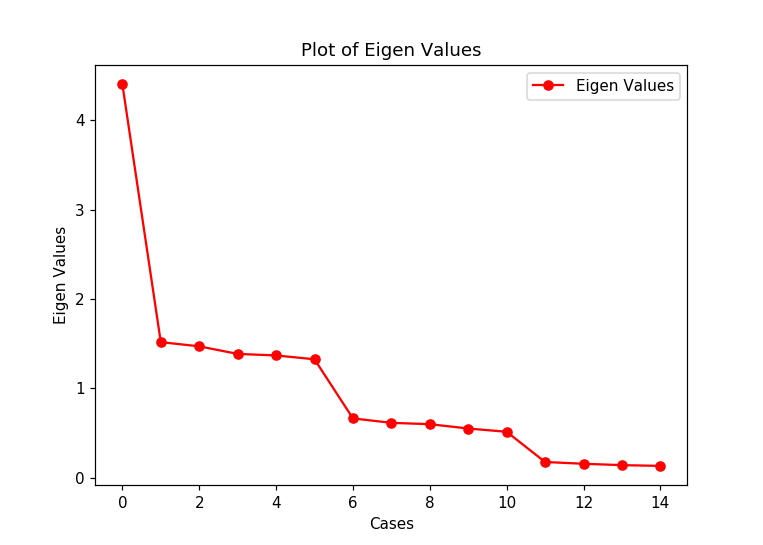

In [14]:
#Plot of Eigen values
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.figure(1)
L1=sorted(eig_vals1,reverse=True, )
plt.plot(L1,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of Eigen Values')
plt.legend()

Plot of ratio of eigen values

<IPython.core.display.Javascript object>


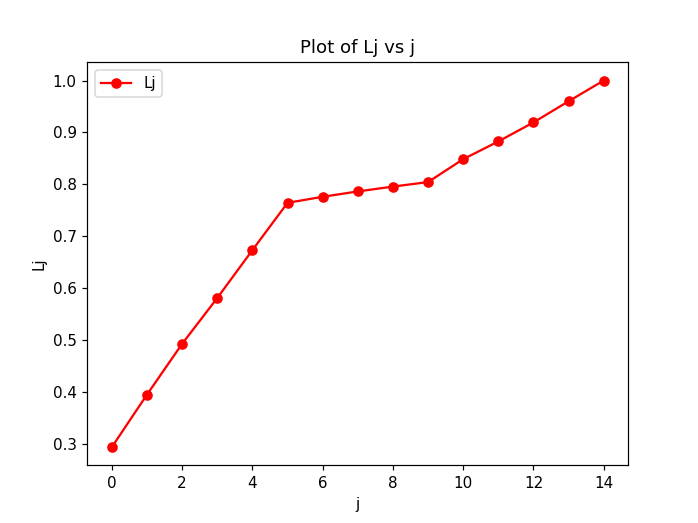

In [15]:
%matplotlib notebook
dgvv1=eig_vals1
da1vv1=[]
for i in range(15):    
    if i ==0:
        Ri = dgvv1[i]
    else:
        Ri+=dgvv1[i]        
    da1vv1.append(Ri)
%matplotlib notebook
plt.plot(da1vv1/(sum(dgvv1)),  marker='o', label='Lj', color='r')
plt.ylabel('Lj')
plt.xlabel('j')
plt.title('Plot of Lj vs j')
plt.legend()

In [16]:
L1=sorted(eig_vals1,reverse=True)

In [17]:
#Smallest Number h95
compare1=sum(L1)*0.95
s1=0
count1=0
for i in L1:
    count1=count1+1
    s1=s1+i
   # print(i)
    if s1>compare1:
       # print(count1)
        break
    
h95=count1
print("The smallest number h95 is: " + str(h95))

The smallest number h95 is: 11


In [18]:
#PCA Analysis
pca0 = PCA(n_components=3)
pca0.fit(data_train)
print(pca0.explained_variance_) 
# Store results of PCA in a data frame
result1=pd.DataFrame(pca0.transform(D1), columns=['PCA%i' % i for i in range(3)], index=D1.index)
result2=pd.DataFrame(pca0.transform(D2), columns=['PCA%i' % i for i in range(3)], index=D2.index)
result3=pd.DataFrame(pca0.transform(D3), columns=['PCA%i' % i for i in range(3)], index=D3.index)
print(result2)

[4.38747335 1.51888369 1.46467196]
            PCA0       PCA1        PCA2
0      83.833221  86.120268  -17.309299
6      -2.554499  44.543609   72.935766
10    137.983682 -52.237173   -2.054982
16    110.304488 -70.875316   70.047700
18     33.639885  93.931832  118.729867
...          ...        ...         ...
9985   86.049608  61.869883  -19.546658
9986  152.022960  24.740445   56.724937
9990  108.102031  67.800031    6.416309
9994  141.928073  -8.305663   31.743545
9995  151.732443  30.838453   43.504822

[3334 rows x 3 columns]


<IPython.core.display.Javascript object>


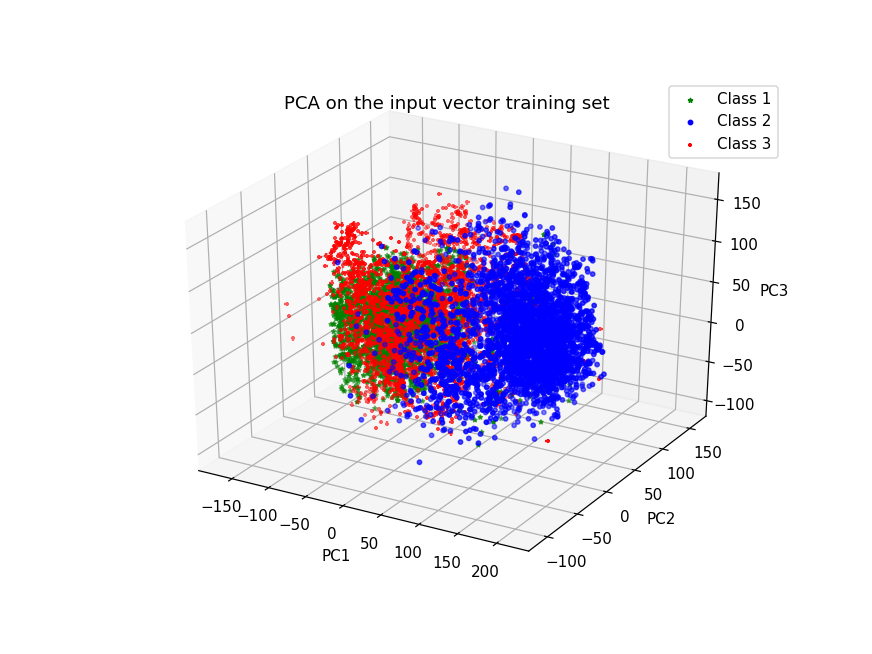

Text(0.5, 0.92, 'PCA on the input vector training set')

In [19]:
# Plot of Principal Components
%matplotlib notebook
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.scatter(result1['PCA0'], result1['PCA1'], result1['PCA2'],s=8,marker='*', color='g', label='Class 1')
ax.scatter(result2['PCA0'], result2['PCA1'], result2['PCA2'],s=8,marker='o', color = 'b', label='Class 2')
ax.scatter(result3['PCA0'], result3['PCA1'], result3['PCA2'],s=8, marker='+', color='r', label='Class 3')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend (loc='best')
ax.set_title("PCA on the input vector training set")

Class 1

In [20]:
#To estimate one larger plausible value hL for the size h
#Class 1
D1_std=StandardScaler().fit_transform(D1)
pd.DataFrame(D1_std).head(4) #standardized data for class 1

0         1         2         3         4         5         6  \
0  1.504661 -1.232811  0.098815  1.034310 -0.192492 -0.052171  0.651067   
1 -0.814471  0.391377  0.147340  1.085777 -0.105632 -1.475132 -0.256490   
2 -1.583494  0.639555  1.123890  1.097321 -0.644815 -0.874277  1.532909   
3  0.480367  1.128298  1.819266 -1.008071  1.481760  3.001304 -0.214018   

          7         8         9        10        11        12        13  \
0 -2.045807 -0.752679 -1.833624  0.578245  1.020349 -1.313134  0.939660   
1  0.301184 -0.127086  0.631239 -2.275183 -1.111078  1.111281 -0.751465   
2  0.387816 -0.748886 -0.331358  1.050723  0.337400  0.243897  0.843346   
3  1.334375  2.458504  0.371896  0.368291  1.354034 -1.907526  1.272987   

         14  
0  1.050744  
1 -1.336210  
2 -0.150622  
3  2.952201

In [21]:
cov_D1=np.corrcoef(np.transpose(D1_std))
pd.DataFrame(cov_D1)#Covariance matrix for class 1

0         1         2         3         4         5         6  \
0   1.000000 -0.455564 -0.453574 -0.017178  0.011144  0.023761  0.022920   
1  -0.455564  1.000000  0.357741 -0.012848  0.139953  0.136815 -0.026042   
2  -0.453574  0.357741  1.000000 -0.052547  0.141651  0.561305 -0.101851   
3  -0.017178 -0.012848 -0.052547  1.000000 -0.442355 -0.511940  0.017063   
4   0.011144  0.139953  0.141651 -0.442355  1.000000  0.453021 -0.016105   
5   0.023761  0.136815  0.561305 -0.511940  0.453021  1.000000 -0.075984   
6   0.022920 -0.026042 -0.101851  0.017063 -0.016105 -0.075984  1.000000   
7   0.011972  0.108315  0.137300  0.028694  0.108041  0.138631 -0.442319   
8  -0.011811  0.138714  0.572514 -0.066861  0.156252  0.594104 -0.513774   
9  -0.007318 -0.019898 -0.171599  0.022461 -0.007328 -0.177376  0.058685   
10  0.038528  0.085134  0.171948  0.005278  0.077578  0.204427  0.015116   
11  0.003827  0.121885  0.564156 -0.068645  0.161437  0.604691 -0.121925   
12 -0.048142  0.066551 -0.136837  0.030147 -0.013037 -0.151424 -0.019517   
13  0.064318  0.043641  0.132977  0.045679  0.085708  0.144456  0.071793   
14 -0.011670  0.092368  0.537997 -0.078728  0.169353  0.566218 -0.084713   

           7         8         9        10        11        12        13  \
0   0.011972 -0.011811 -0.007318  0.038528  0.003827 -0.048142  0.064318   
1   0.108315  0.138714 -0.019898  0.085134  0.121885  0.066551  0.043641   
2   0.137300  0.572514 -0.171599  0.171948  0.564156 -0.136837  0.132977   
3   0.028694 -0.066861  0.022461  0.005278 -0.068645  0.030147  0.045679   
4   0.108041  0.156252 -0.007328  0.077578  0.161437 -0.013037  0.085708   
5   0.138631  0.594104 -0.177376  0.204427  0.604691 -0.151424  0.144456   
6  -0.442319 -0.513774  0.058685  0.015116 -0.121925 -0.019517  0.071793   
7   1.000000  0.403294 -0.024843  0.066038  0.164685  0.082763 -0.009619   
8   0.403294  1.000000 -0.203743  0.189754  0.600879 -0.132683  0.115008   
9  -0.024843 -0.203743  1.000000 -0.426313 -0.576743  0.038707  0.036770   
10  0.066038  0.189754 -0.426313  1.000000  0.460849  0.010557 -0.005092   
11  0.164685  0.600879 -0.576743  0.460849  1.000000 -0.152257  0.122344   
12  0.082763 -0.132683  0.038707  0.010557 -0.152257  1.000000 -0.414064   
13 -0.009619  0.115008  0.036770 -0.005092  0.122344 -0.414064  1.000000   
14  0.107638  0.541790 -0.220414  0.170868  0.584866 -0.547126  0.359633   

          14  
0  -0.011670  
1   0.092368  
2   0.537997  
3  -0.078728  
4   0.169353  
5   0.566218  
6  -0.084713  
7   0.107638  
8   0.541790  
9  -0.220414  
10  0.170868  
11  0.584866  
12 -0.547126  
13  0.359633  
14  1.000000

In [22]:
#EigenValues and EigenVectors
eig_valsD1,eig_vecsD1=np.linalg.eig(cov_D1)
print(eig_valsD1)

[4.06337566 1.77257635 1.61860994 1.58636602 1.50559822 0.85852878
 0.71390154 0.15283266 0.24326227 0.19317562 0.19666644 0.55835813
 0.53149571 0.5078201  0.49743256]


In [23]:
pd.DataFrame(eig_vecsD1)

0         1         2         3         4         5         6  \
0   0.065825 -0.347653  0.403771  0.398800 -0.079570  0.126367 -0.307577   
1  -0.137104  0.320966 -0.371387 -0.272185  0.085675  0.390500  0.077418   
2  -0.371656  0.149091 -0.199813 -0.259981  0.016539 -0.237632 -0.236992   
3   0.126661  0.105361  0.356701 -0.509136 -0.135052  0.147172 -0.359013   
4  -0.178918 -0.059867 -0.345872  0.420012  0.076889  0.376212  0.037771   
5  -0.398099 -0.096625 -0.182457  0.261905  0.062560 -0.155044 -0.229540   
6   0.139558 -0.351309 -0.228988 -0.171543  0.429283  0.066888 -0.434734   
7  -0.153075  0.347370  0.182489  0.173112 -0.361264  0.382140 -0.044913   
8  -0.393721  0.161188  0.146810  0.063510 -0.249540 -0.148924 -0.161439   
9   0.207871 -0.015681 -0.361014  0.055316 -0.426637 -0.006637 -0.446040   
10 -0.192811  0.030986  0.293709 -0.027758  0.440403  0.388841  0.016714   
11 -0.409531 -0.016301  0.220988 -0.046518  0.218835 -0.065102 -0.118314   
12  0.154229  0.474299  0.013605  0.227507  0.257924  0.033244 -0.476145   
13 -0.128836 -0.400254 -0.077221 -0.222771 -0.264446  0.495966 -0.052679   
14 -0.381827 -0.270496  0.009521 -0.155729 -0.143546 -0.112197 -0.020959   

           7         8         9        10        11        12        13  \
0  -0.096907  0.126237  0.399909  0.087873 -0.039007 -0.061535 -0.485204   
1  -0.007530  0.015399  0.031456 -0.007671 -0.031216 -0.105298 -0.697749   
2  -0.140132  0.262582  0.674302  0.157196  0.009164  0.015107  0.225523   
3   0.368059  0.064321 -0.066329 -0.006201  0.002214  0.191318  0.017292   
4  -0.076418  0.042642  0.013710  0.020974 -0.016740  0.268318  0.205997   
5   0.768919  0.082643 -0.129861 -0.024963 -0.010451 -0.076823 -0.073802   
6  -0.183800  0.134745 -0.261153  0.202939  0.101461  0.396276 -0.028199   
7   0.019066  0.020714  0.029139 -0.012767  0.181623  0.509085  0.112608   
8  -0.333072  0.244765 -0.520508  0.423699 -0.046531 -0.200508 -0.071688   
9  -0.128690 -0.043029 -0.058587 -0.347748  0.456344 -0.297299  0.042593   
10  0.021707 -0.042574  0.023695  0.090566  0.539010 -0.422590  0.219206   
11 -0.259806  0.067395 -0.128452 -0.769423 -0.150336  0.094373 -0.050000   
12 -0.054569 -0.444789  0.023469  0.068635 -0.400693 -0.147069  0.121131   
13 -0.003679 -0.011004 -0.006395 -0.002735 -0.491119 -0.296620  0.277501   
14 -0.075931 -0.785769  0.043412  0.140277  0.168655  0.168832 -0.126577   

          14  
0   0.046064  
1  -0.009379  
2  -0.008274  
3   0.486478  
4   0.629681  
5  -0.150477  
6  -0.260850  
7  -0.455447  
8   0.118740  
9   0.030232  
10 -0.034418  
11  0.018249  
12 -0.045067  
13 -0.206271  
14  0.073042

<IPython.core.display.Javascript object>


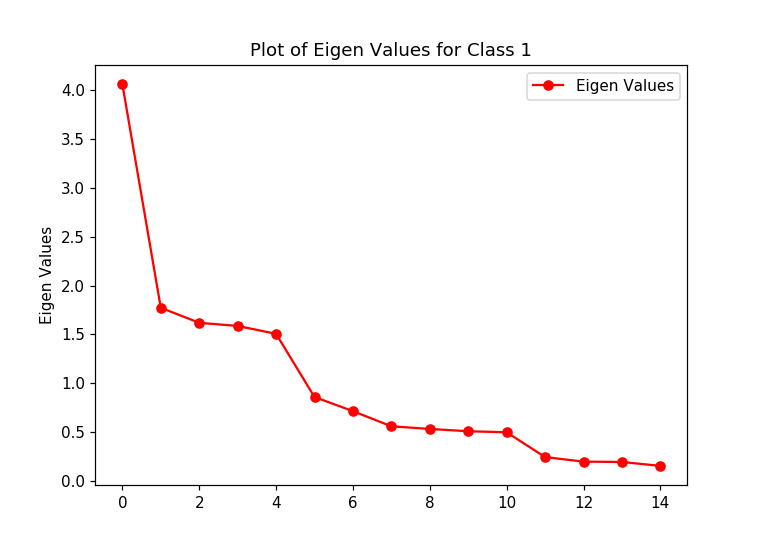

In [24]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.figure(1)
L1=sorted(eig_valsD1,reverse=True, )
plt.plot(L1,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('')
plt.title('Plot of Eigen Values for Class 1')
plt.legend()

<IPython.core.display.Javascript object>


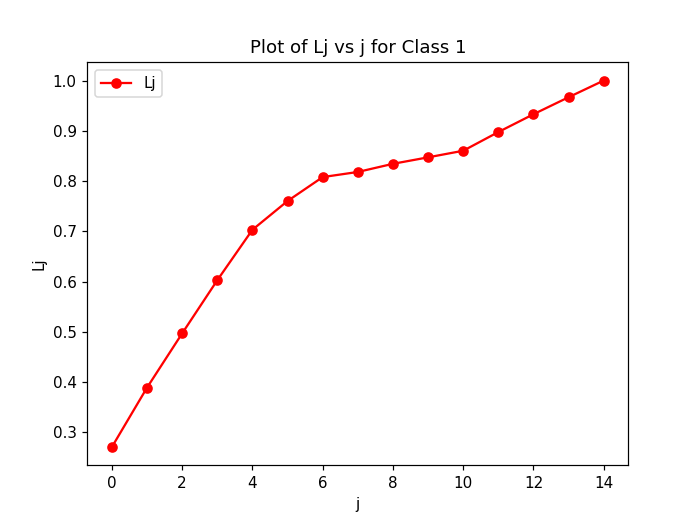

In [25]:
%matplotlib notebook
dgvv=eig_valsD1
da1vv=[]
for i in range(15):    
    if i ==0:
        Ri = dgvv[i]
    else:
        Ri+=dgvv[i]        
    da1vv.append(Ri)
%matplotlib notebook
plt.plot(da1vv/(sum(dgvv)),  marker='o', label='Lj', color='r')
plt.ylabel('Lj')
plt.xlabel('j')
plt.title('Plot of Lj vs j for Class 1')
plt.legend()

In [26]:
LD1=sorted(eig_valsD1,reverse=True)

In [27]:
#Smallest Value
compareD1=sum(LD1)*0.95
sD1=0
countD1=0
L1=sorted(eig_valsD1,reverse=True, )
for i in LD1:
    countD1=countD1+1
    sD1=sD1+i
    #print(i)
    if sD1>compareD1:
        #print(countD1)
        break
    
U1=countD1
print("The smallest number is: " + str(U1))

The smallest number is: 12


In [28]:
#PCA Analysis
pcac1 = PCA(n_components=3)
pcac1.fit(D1)
# Store results of PCA in a data frame
resultD1=pd.DataFrame(pcac1.transform(D1), columns=['PCA%i' % i for i in range(3)], index=D1.index)
print(resultD1)

             PCA0       PCA1       PCA2
2       18.789331  79.891750 -40.874546
4      -65.934417 -46.259117  35.197098
7        1.138674  -8.412521  38.768932
17     143.491940  39.589372  23.600128
22     -26.634232  11.521728  26.692040
...           ...        ...        ...
9989   -14.663742  24.675748  50.385601
9997     3.734942 -52.193157  15.043205
9998    13.822864  -7.304827 -44.134068
9999    33.436587 -15.307020  49.457841
10000   32.836089 -40.435823 -22.075187

[3334 rows x 3 columns]


<IPython.core.display.Javascript object>


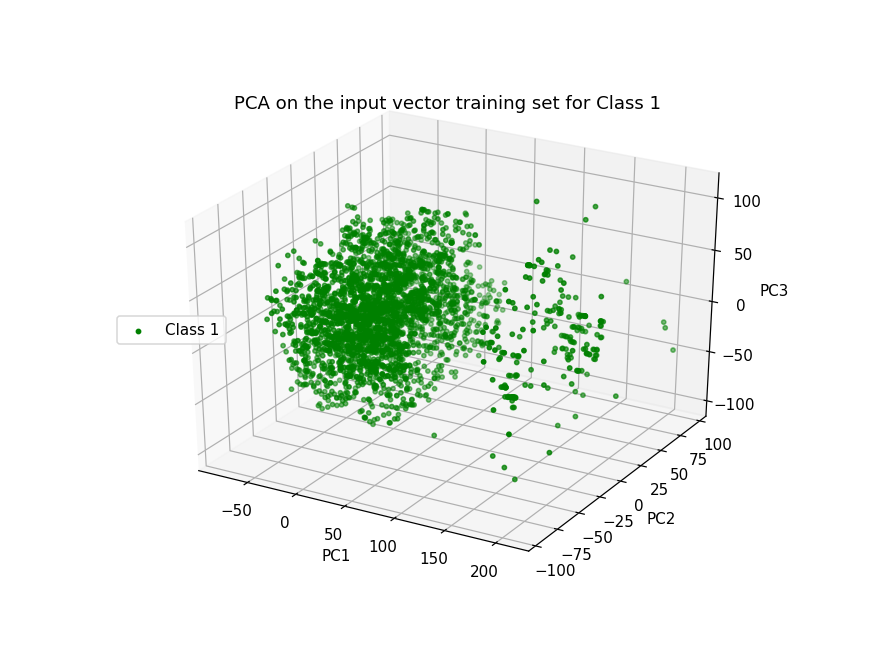

Text(0.5, 0.92, 'PCA on the input vector training set for Class 1')

In [29]:
# Plot of Principal Components
%matplotlib notebook
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(1,1,1, projection='3d') 
ax2.scatter(resultD1['PCA0'], resultD1['PCA1'], resultD1['PCA2'],s=8,marker='o', color='g', label='Class 1')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.legend (loc='center left')
ax2.set_title("PCA on the input vector training set for Class 1")

Class 2

In [30]:
D2_std=StandardScaler().fit_transform(D2)
pd.DataFrame(D2_std).head(4)  #standardized data for class 2

0         1         2         3         4         5         6  \
0  1.547031 -1.335023 -1.985179  0.119540  1.587402 -0.276369  0.205653   
1 -1.265657 -0.032247  0.140151  0.234832 -2.481356 -2.317018 -0.418473   
2 -0.387641 -0.060208  0.457523  0.450231  0.968825  0.401492  0.073763   
3 -0.598171  0.384612  1.275666  0.452349  0.892797  1.308154 -0.465679   

          7         8         9        10        11        12        13  \
0 -0.204236 -0.697726  0.451457  1.177026 -0.875927 -0.606780  1.576873   
1  0.098789 -0.278358  0.761777 -1.661107 -2.450495  0.348995 -0.091833   
2  1.187924  0.834082 -0.996422  0.984059  1.361042  0.721543 -1.236205   
3 -0.414415  0.520271  1.323375  0.839482  0.646868  1.708417 -1.527510   

         14  
0 -0.047138  
1 -0.592178  
2 -1.381079  
3 -2.251795

In [31]:
#Covariant Matrix for Clas 2
cov_D2=np.corrcoef(np.transpose(D2_std))
pd.DataFrame(cov_D2).head(4)#Covariance matrix for class 2

0         1         2         3         4         5         6  \
0  1.000000 -0.188126 -0.494252  0.160735 -0.003887  0.017436  0.129569   
1 -0.188126  1.000000  0.621127 -0.030694  0.079175 -0.009472 -0.029369   
2 -0.494252  0.621127  1.000000 -0.022273  0.003063  0.185475 -0.003458   
3  0.160735 -0.030694 -0.022273  1.000000 -0.179735 -0.463646  0.192800   

          7         8         9        10        11        12        13  \
0  0.005477  0.020501  0.132931 -0.029184  0.014083  0.122840 -0.010091   
1  0.059603 -0.032439 -0.038752  0.016804 -0.049803 -0.020220  0.026693   
2 -0.007210  0.157221 -0.017420 -0.033561  0.132384  0.029285 -0.049370   
3 -0.032609 -0.027969  0.186231 -0.036647 -0.035916  0.134125 -0.004761   

         14  
0  0.042390  
1 -0.041190  
2  0.094608  
3  0.018781

In [32]:
#EigenValues and EigenVectors for Class 2
eig_valsD2,eig_vecsD2=np.linalg.eig(cov_D2)
print(eig_valsD2)

[2.47646514 1.93380782 1.84244204 1.74146772 1.6417704  1.19259234
 0.12197182 0.13080307 0.14092376 0.13914761 0.66929308 0.78058318
 0.75955087 0.70509272 0.72408843]


<IPython.core.display.Javascript object>


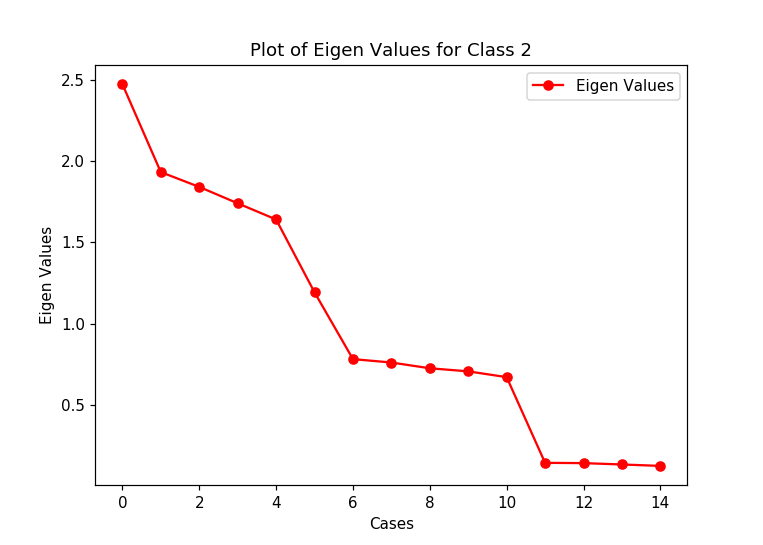

In [33]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.figure(1)
L1=sorted(eig_valsD2,reverse=True, )
plt.plot(L1,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of Eigen Values for Class 2')
plt.legend()

<IPython.core.display.Javascript object>


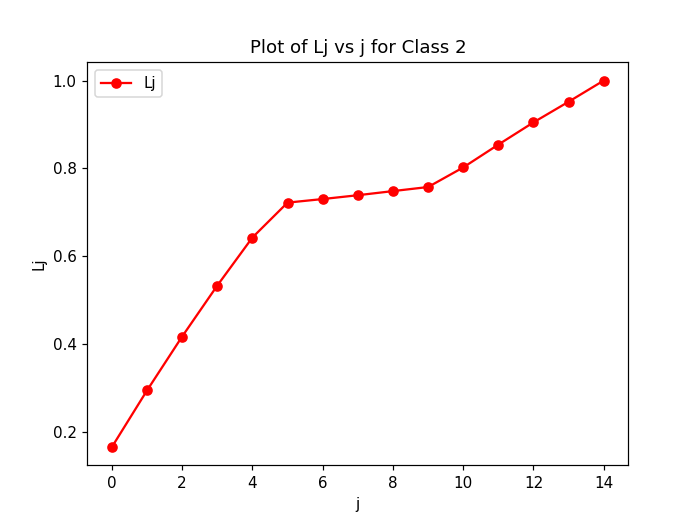

In [34]:
%matplotlib notebook
dgvv2=eig_valsD2
da1vv2=[]
for i in range(15):    
    if i ==0:
        Ri = dgvv2[i]
    else:
        Ri+=dgvv2[i]        
    da1vv2.append(Ri)
%matplotlib notebook
plt.plot(da1vv2/(sum(dgvv2)),  marker='o', label='Lj', color='r')
plt.ylabel('Lj')
plt.xlabel('j')
plt.title('Plot of Lj vs j for Class 2')
plt.legend()

In [35]:
LD2=sorted(eig_valsD2,reverse=True)

In [36]:
compareD2=sum(LD2)*0.95
sD2=0
countD2=0
for i in LD2:
    countD2=countD2+1
    sD2=sD2+i
    #print(i)
    if sD2>compareD2:
     #   print(countD2)
        break
    
U2=countD2
U2
print("The smallest number is: " + str(U2))

The smallest number is: 11


In [37]:
#PCA Analysis
pcac3 = PCA(n_components=3)
pcac3.fit(D2)
# Store results of PCA in a data frame
resultD2=pd.DataFrame(pcac3.transform(D2), columns=['PCA%i' % i for i in range(3)], index=D2.index)
print(resultD2)

            PCA0        PCA1       PCA2
0      19.882945  -42.137204  56.613356
6     103.194411   -7.667214 -56.536947
10    -63.513354   84.398086  16.716125
16    -23.656855  109.724422 -30.871048
18     79.689567  -88.339771 -62.186070
...          ...         ...        ...
9985   28.697932    1.724991  80.274300
9986  -35.574612   -8.269584 -39.921107
9990   19.337726    9.392943  31.779461
9994  -29.283802   46.562206  12.894110
9995  -36.171361  -14.441834  11.210825

[3334 rows x 3 columns]


<IPython.core.display.Javascript object>


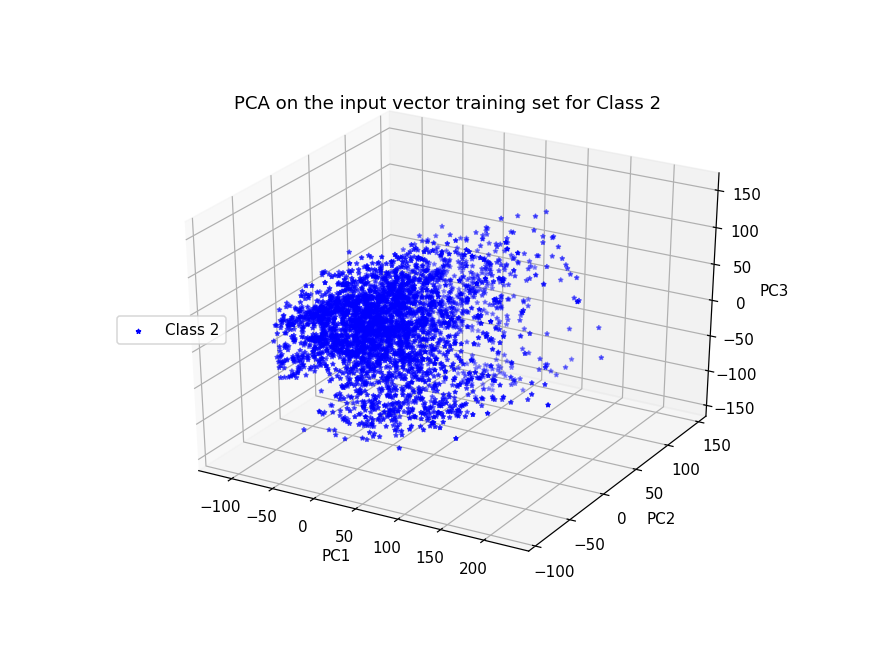

Text(0.5, 0.92, 'PCA on the input vector training set for Class 2')

In [38]:
# Plot of Principal Components
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(1,1,1, projection='3d') 
ax3.scatter(resultD2['PCA0'], resultD2['PCA1'], resultD2['PCA2'],s=8,marker='*', color='b', label='Class 2')
ax3.set_xlabel("PC1")
ax3.set_ylabel("PC2")
ax3.set_zlabel("PC3")
ax3.legend (loc='center left')
ax3.set_title("PCA on the input vector training set for Class 2")

Class 3

In [39]:
D3_std=StandardScaler().fit_transform(D3)
pd.DataFrame(D3_std).head(4)  #standardized data for class 3

0         1         2         3         4         5         6  \
0  1.600146 -1.662380 -1.605408  0.927640 -1.576025 -1.472627  0.172335   
1  0.400539 -0.565212 -1.118359 -0.008332  0.405190  0.297154  0.622695   
2 -2.665469  0.090633  1.084350 -0.310466  0.662577  0.666607 -0.326063   
3 -0.267809  1.291773  0.597533  0.204279 -1.691111 -1.133181  1.458491   

          7         8         9        10        11        12        13  \
0 -1.777729 -1.182445  0.106799  1.630486  0.308398  0.178648  0.570246   
1  0.315968 -0.802746  0.040685 -0.920768 -0.827710 -0.141525  1.788148   
2  1.840615  0.740199  1.376869 -0.299039  0.167738  0.339576 -0.694692   
3 -0.528331 -0.750647 -1.924617  0.403109  0.299762  0.002475  0.613786   

         14  
0  0.261076  
1  0.398550  
2 -0.311899  
3  0.613538

In [40]:
#Covariant Matrix for Clas 3
cov_D3=np.corrcoef(np.transpose(D3_std))
pd.DataFrame(cov_D3).head(4)#Covariance matrix for class 3

0         1         2         3         4         5         6  \
0  1.000000 -0.368009 -0.384430  0.020087 -0.068541 -0.188989  0.004910   
1 -0.368009  1.000000  0.618927 -0.054968 -0.075118  0.082797 -0.084154   
2 -0.384430  0.618927  1.000000 -0.135704  0.056986  0.392538 -0.144237   
3  0.020087 -0.054968 -0.135704  1.000000 -0.329794 -0.439380  0.021648   

          7         8         9        10        11        12        13  \
0 -0.028518 -0.150575 -0.008229 -0.054864 -0.140276  0.057367 -0.015223   
1 -0.126560  0.034243 -0.045718 -0.111363 -0.016855 -0.062375 -0.131587   
2 -0.016704  0.323156 -0.116079 -0.026669  0.287168 -0.140501 -0.043160   
3 -0.056917 -0.170636  0.045953 -0.050037 -0.137864  0.017933  0.024995   

         14  
0 -0.104384  
1 -0.032580  
2  0.273223  
3 -0.082987

In [41]:
#EigenValues and EigenVectors for Class 3
eig_valsD3,eig_vecsD3=np.linalg.eig(cov_D3)
print(eig_valsD3)

[3.10655699 2.01812158 1.89936038 1.64837126 1.81105203 0.82402068
 0.77797873 0.70066727 0.65007362 0.53496336 0.28233858 0.23130757
 0.14504887 0.19105152 0.17908755]


<IPython.core.display.Javascript object>


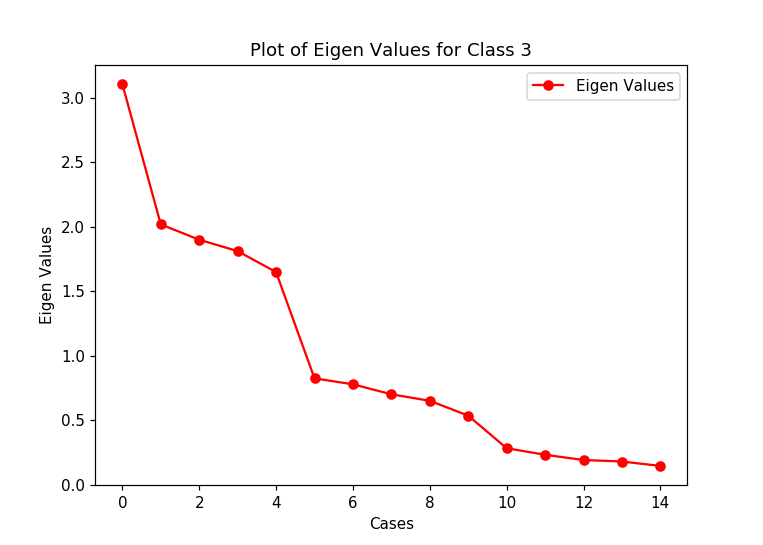

In [42]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.figure(1)
L1=sorted(eig_valsD3,reverse=True, )
plt.plot(L1,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of Eigen Values for Class 3')
plt.legend()

<IPython.core.display.Javascript object>


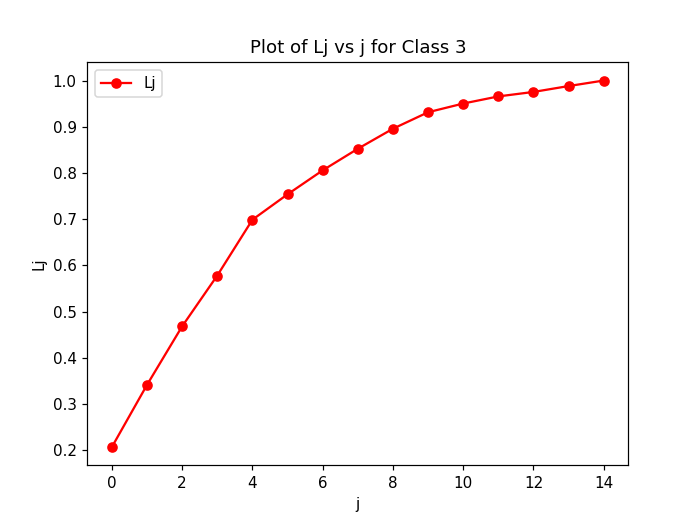

In [43]:
%matplotlib notebook
dgvv3=eig_valsD3
da1vv3=[]
for i in range(15):    
    if i ==0:
        Ri = dgvv3[i]
    else:
        Ri+=dgvv3[i]        
    da1vv3.append(Ri)
%matplotlib notebook
plt.plot(da1vv3/(sum(dgvv3)),  marker='o', label='Lj', color='r')
plt.ylabel('Lj')
plt.xlabel('j')
plt.title('Plot of Lj vs j for Class 3')
plt.legend()

In [44]:
LD3=sorted(eig_valsD3,reverse=True)

In [45]:
compareD3=sum(LD3)*0.95
sD3=0
countD3=0
for i in LD3:
    countD3=countD3+1
    sD3=sD3+i
   # print(i)
    if sD3>compareD3:
       # print(countD3)
        break
    
U3=countD3
U3
print("The smallest number is: " + str(U3))

The smallest number is: 11


In [46]:
#PCA Analysis
pcac4 = PCA(n_components=3)
pcac4.fit(D3)
# Store results of PCA in a data frame
resultD3=pd.DataFrame(pcac4.transform(D3), columns=['PCA%i' % i for i in range(3)], index=D3.index)
print(resultD3)

            PCA0        PCA1       PCA2
1     -47.080085  113.573884  41.091023
3     -19.777299   64.341962 -27.666581
5      32.188087  -75.233057  18.300147
8       9.888209   53.371407  -4.346209
9     -76.712459  102.095774 -40.463964
...          ...         ...        ...
9991   40.812441  -62.668756  40.578467
9992  -21.295435   96.418971  10.154413
9993  -65.313322  104.110450  79.149839
9996   64.145621  -30.583498  46.527712
10001  19.254683   56.730044 -93.928886

[3334 rows x 3 columns]


<IPython.core.display.Javascript object>


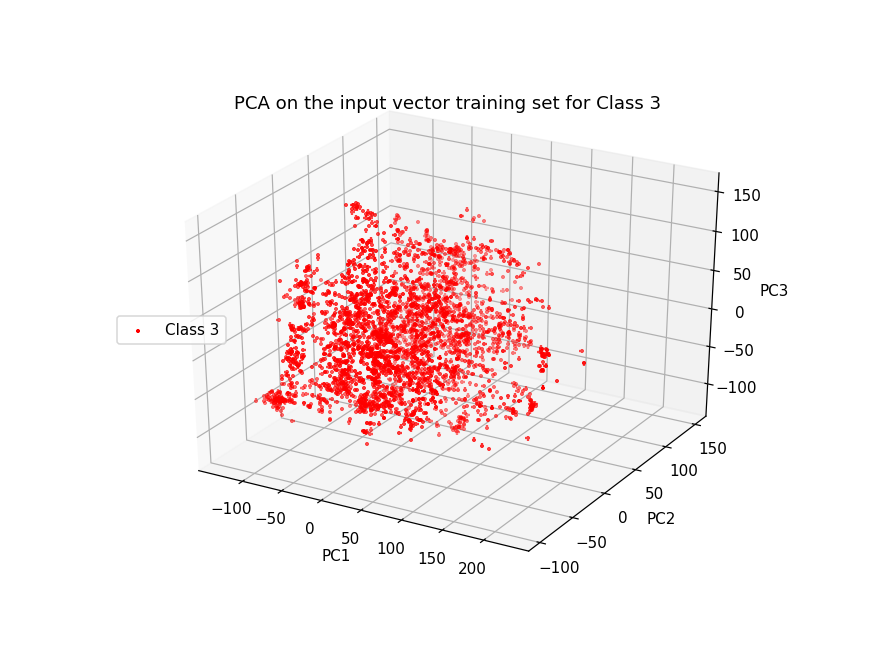

Text(0.5, 0.92, 'PCA on the input vector training set for Class 3')

In [47]:
# Plot of Principal Components
%matplotlib notebook
fig4 = plt.figure(figsize=(8, 6))
ax4 = fig4.add_subplot(1,1,1, projection='3d') 
ax4.scatter(resultD3['PCA0'], resultD3['PCA1'], resultD3['PCA2'],s=8,marker='+', color='r', label='Class 3')
ax4.set_xlabel("PC1")
ax4.set_ylabel("PC2")
ax4.set_zlabel("PC3")
ax4.legend (loc='center left')
ax4.set_title("PCA on the input vector training set for Class 3")

In [48]:
#Size of hL
hL= U1+U2+U3
print("Plausible value of hL is: " + str(hL)) 

Plausible value of hL is: 34


# PART 3 & 4 : Automatic Training and Performance Analysis

For number of hidden neuron h95 = 11

In [60]:
def fun (b,w,l, h ):
    import math
    training_epochs = 1000 #training epoch
    batch_size= b #batch size
    display_step=1 #step_size

    n_hidden = h #number of hidden layer =h95 first
    n_input = 15  #number of inputs equal number of features
    n_classes = 3  #number of classes number of output
    d=math.sqrt(h*15 + h + h *3 + 3) #square root of dimension

    #learning
    global1_step=tf.Variable(0,trainable=False)
    initial_learning_rate=l
    learning_rate=tf.compat.v1.train.exponential_decay(initial_learning_rate,\
    global_step=global1_step, decay_steps=training_epochs, decay_rate=0.9)

    add_global=global1_step.assign_add(1)

    X=tf.compat.v1.placeholder("float",[None,n_input])
    Y=tf.compat.v1.placeholder("float",[None,n_classes])
    
    random.seed(w)
    weights={
            'h': tf.Variable(tf.random_normal([n_input,n_hidden])),
            'out':tf.Variable(tf.random_normal([n_hidden,n_classes]))
            }

    biases={
            'b':tf.Variable(tf.random_normal([n_hidden])),
            'out':tf.Variable(tf.random_normal([n_classes]))
            }

    def MLP(x):
        layer_1=tf.add(tf.matmul(x,weights['h']), biases['b'])
        layer_1=tf.nn.relu(layer_1)
        out_layer=tf.matmul(layer_1, weights['out'])+biases['out']

        return out_layer

    #construct model
    logits=MLP(X)

    #define loss and optimizer


    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    confusion_matrix=tf.math.confusion_matrix(tf.argmax(logits,1),tf.argmax(Y,1))
    init=tf.global_variables_initializer()

    #Initializing the variables
    with tf.Session() as sess:
        sess.run(init)
        ini_acu=sess.run(accuracy,feed_dict={X:data_train,Y:y_train})
        train_accu1=[]
        test_accu1=[]
        train_loss=[]
        test_loss=[]
        L_R1=[]
        LOSS1=[]
        W_n1=[]
        relW=[]
        G_n1=[]
        G_ave1=[]
        BACRE1=[]
        LOSSBA = []
        ACRE1=[]
        #Training cycle
        for epoch in range(training_epochs):
            
            avg_cost=0
            total_batch=int(data_train.shape[0]/batch_size)
            store=np.append(np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)))
            store=np.append(store,np.reshape(sess.run(biases['b']),(1,n_hidden)))
            store=np.append(store,np.reshape(sess.run(biases['out']),(1,n_classes)))
            for i in range(total_batch):
                       
                step,rate=sess.run([add_global,learning_rate])
                L_R1.append(rate)
                # print(rate)
                random.seed(1000)
                randidx=np.random.randint(8001,size=batch_size)
                batch_xs=data_train.iloc[randidx,:]
                batch_ys=y_train.iloc[randidx,:]
           
                sess.run(optimizer,feed_dict={X:batch_xs,Y:batch_ys})
                c = sess.run(loss,feed_dict={X:batch_xs,Y:batch_ys})
                BACRE1.append(sess.run(accuracy,feed_dict={X:batch_xs,Y:batch_ys}))
                LOSSBA.append(sess.run(loss,feed_dict={X:batch_xs,Y:batch_ys}))
                #print(c)
                LOSS1.append(c)
                W1=np.reshape(sess.run(weights['h']),(1,n_hidden*n_input))
                W2=np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden))
                W3=np.reshape(sess.run(biases['b']),(1,n_hidden))
                W4=np.reshape(sess.run(biases['out']),(1,n_classes))
                W=np.concatenate((W1,W2,W3,W4),axis=1)
                #W=np.append(W1,W2)
                #W=np.append(W,W3)
                #W=np.append(W,W4)
                WW=LA.norm(W-store)
                relW.append(WW/(LA.norm(store)))
                W_n1.append(WW)
                # print(WW)
                G_n1.append(WW/rate)
                G_ave1.append(WW/(rate*d))
                store=W
                avg_cost+=c/total_batch
                if step%80==0:
                    train=sess.run(accuracy,feed_dict={X:data_train,Y:y_train})
                    train_accu1.append(train)
                    test=sess.run(accuracy,feed_dict={X:data_test,Y:y_test})
                    test_accu1.append(test)
                    train_loss.append(sess.run(loss,feed_dict={X:data_train,Y:y_train}))
                    test_loss.append(sess.run(loss,feed_dict={X:data_test,Y:y_test}))
        ax=sess.run(confusion_matrix,feed_dict={X:data_test,Y:y_test})
        ay=sess.run(confusion_matrix,feed_dict={X:data_train,Y:y_train})      

    return train_accu1, test_accu1,train_loss, test_loss,ax,ay,LOSS1,W_n1,G_ave1,W1,W3,BACRE1, LOSSBA

In [76]:
train_accu1, test_accu1,train_loss, test_loss,axcom,aycom,LOSS1,W_n1,G_ave1,W11,W31,BACRE1,LOSSBA11 = fun (1000, 1000, 0.01, 11) 

In [80]:
#Confusion Matrix for the Training Set
vv = np.array([sum(aycom[0,:]),sum(aycom[1,:]),sum(aycom[2,:])])
np.around((aycom.T/vv).T, decimals=3)

array([[0.802, 0.113, 0.085],
       [0.125, 0.837, 0.038],
       [0.101, 0.018, 0.881]])

In [81]:
#Confusion Matrix for the Test Set
vvt = np.array([sum(axcom[0,:]),sum(axcom[1,:]),sum(axcom[2,:])])
np.around((axcom.T/vvt).T, decimals=3)

array([[0.791, 0.115, 0.094],
       [0.131, 0.837, 0.032],
       [0.115, 0.019, 0.866]])

<IPython.core.display.Javascript object>


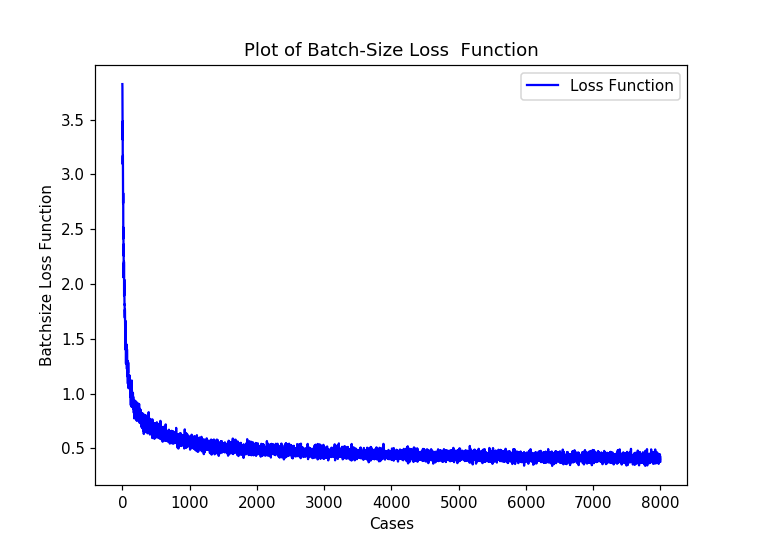

In [84]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),LOSSBA11,  color='b', label='Loss Function')
plt.ylabel('Batchsize Loss Function')
plt.xlabel('Cases')
plt.title('Plot of Batch-Size Loss  Function')
plt.legend()

<IPython.core.display.Javascript object>


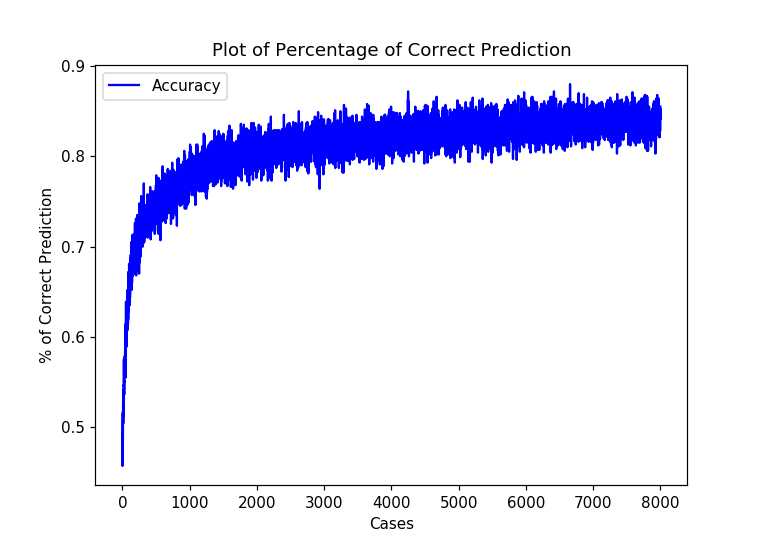

In [85]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),BACRE1,  color='b', label='Accuracy')
plt.ylabel('% of Correct Prediction')
plt.xlabel('Cases')
plt.title('Plot of Percentage of Correct Prediction')
plt.legend()

<IPython.core.display.Javascript object>


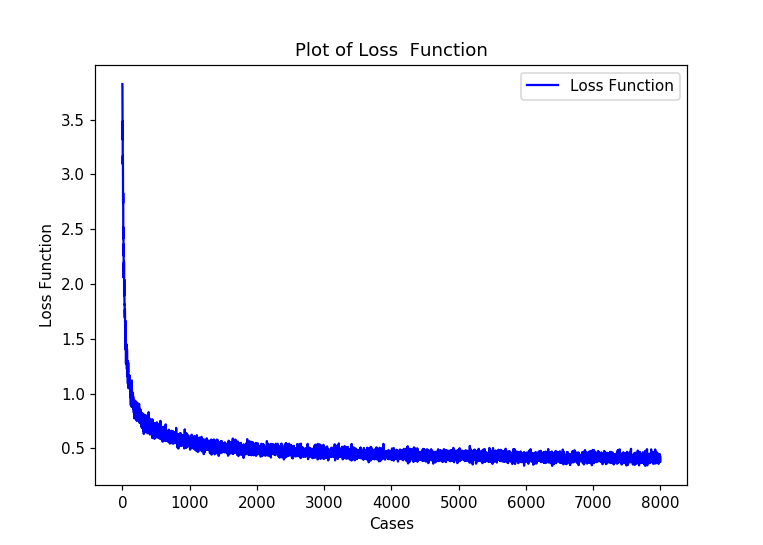

In [86]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),LOSS1,  color='b', label='Loss Function')
plt.ylabel('Loss Function')
plt.xlabel('Cases')
plt.title('Plot of Loss  Function')
plt.legend() 

<IPython.core.display.Javascript object>


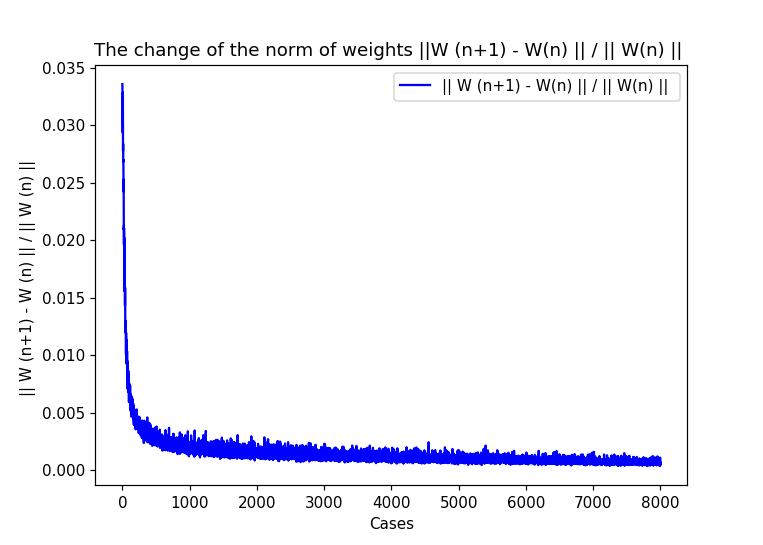

In [87]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),W_n1,  color='b',  label='|| W (n+1) - W(n) || / || W(n) || ')
plt.ylabel('|| W (n+1) - W (n) || / || W (n) || ')
plt.xlabel('Cases')
plt.title('The change of the norm of weights ||W (n+1) - W(n) || / || W(n) || ')
plt.legend() 

<IPython.core.display.Javascript object>


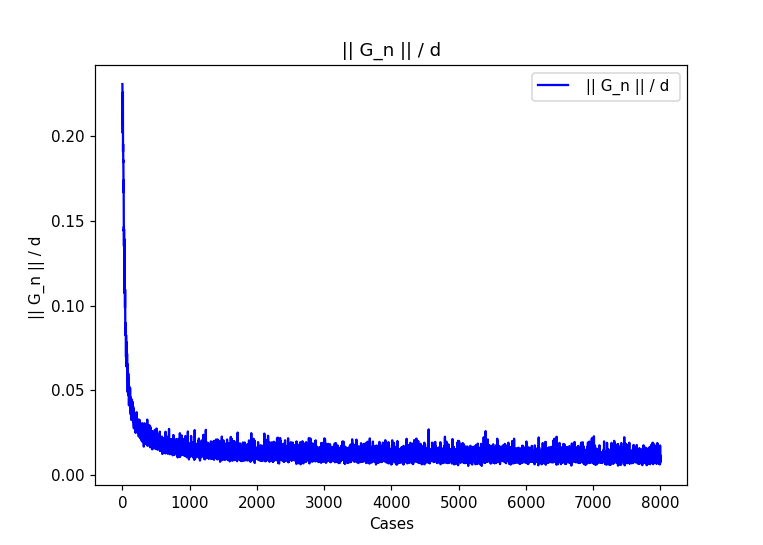

In [88]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),G_ave1,  color='b',  label=' || G_n || / d ')
plt.ylabel('|| G_n || / d ')
plt.xlabel('Cases')
plt.title(' || G_n || / d ')
plt.legend()

<IPython.core.display.Javascript object>


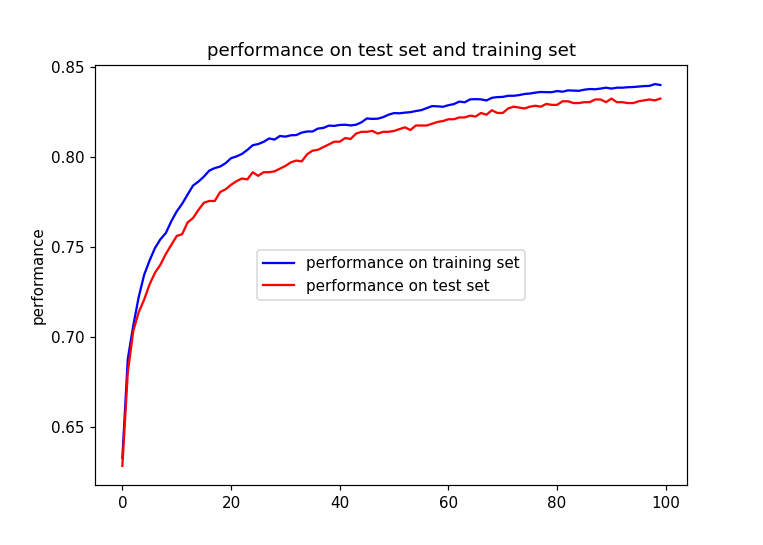

In [89]:
%matplotlib notebook
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot( train_accu1, color='b',label='performance on training set')
ax.plot( test_accu1, color='r',label='performance on test set')
plt.ylabel('performance')
plt.title('performance on test set and training set')
ax.legend(loc='center')
plt.show()

<IPython.core.display.Javascript object>


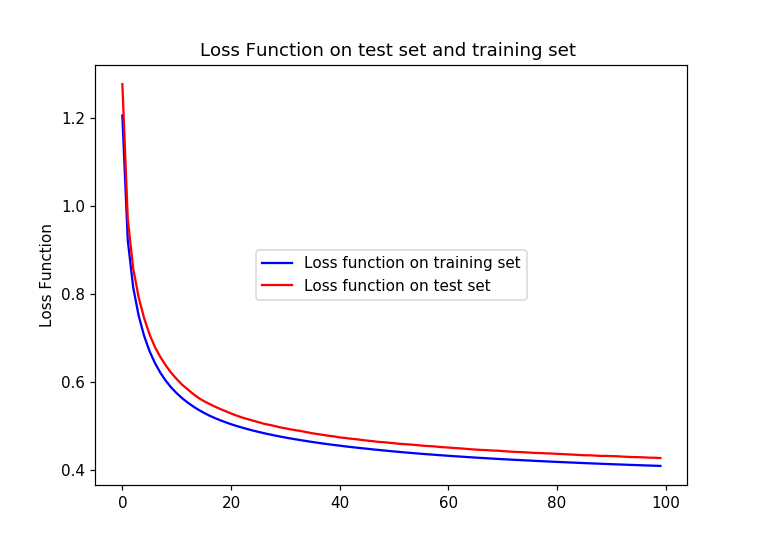

In [90]:
%matplotlib notebook
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot( train_loss, color='b',label='Loss function on training set')
ax.plot( test_loss, color='r',label='Loss function on test set')
plt.ylabel('Loss Function')
plt.title('Loss Function on test set and training set ')
ax.legend(loc='center')
plt.show()

For number of hidden neuron hL = 34

In [94]:
train_accu12, test_accu12,train_loss2, test_loss2,ax2com,ay2com,LOSS12,W_n12,G_ave12,W34,W35,BACRE2,LOSSBA12  = fun (1000, 1000, 0.01, 34) 

In [95]:
#Confusion Matrix for the Training Set
vvtr = np.array([sum(ay2com[0,:]),sum(ay2com[1,:]),sum(ay2com[2,:])])
np.around((ay2com.T/vvtr).T, decimals=3)

array([[0.873, 0.091, 0.035],
       [0.101, 0.884, 0.015],
       [0.046, 0.012, 0.942]])

In [96]:
#Confusion Matrix for the Test Set
vvte1 = np.array([sum(ax2com[0,:]),sum(ax2com[1,:]),sum(ax2com[2,:])])
np.around((ax2com.T/vvte1).T, decimals=3)

array([[0.854, 0.107, 0.039],
       [0.088, 0.899, 0.012],
       [0.057, 0.007, 0.935]])

<IPython.core.display.Javascript object>


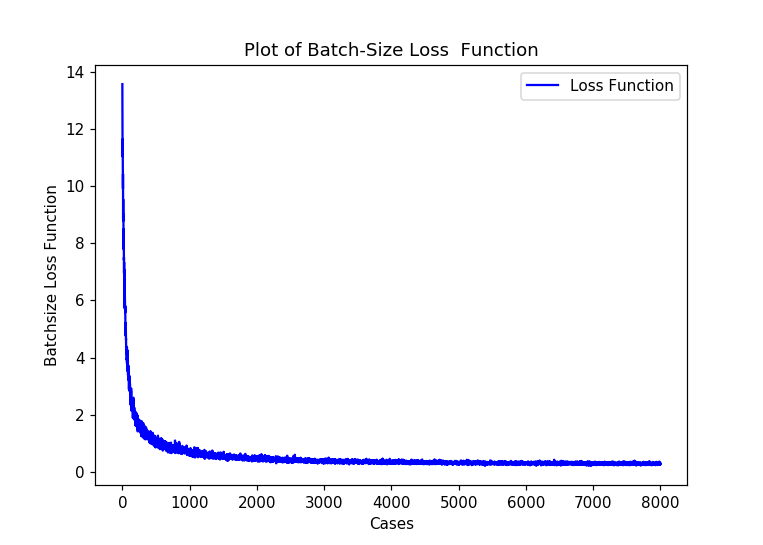

In [101]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),LOSSBA12,  color='b', label='Loss Function')
plt.ylabel('Batchsize Loss Function')
plt.xlabel('Cases')
plt.title('Plot of Batch-Size Loss  Function')
plt.legend()

<IPython.core.display.Javascript object>


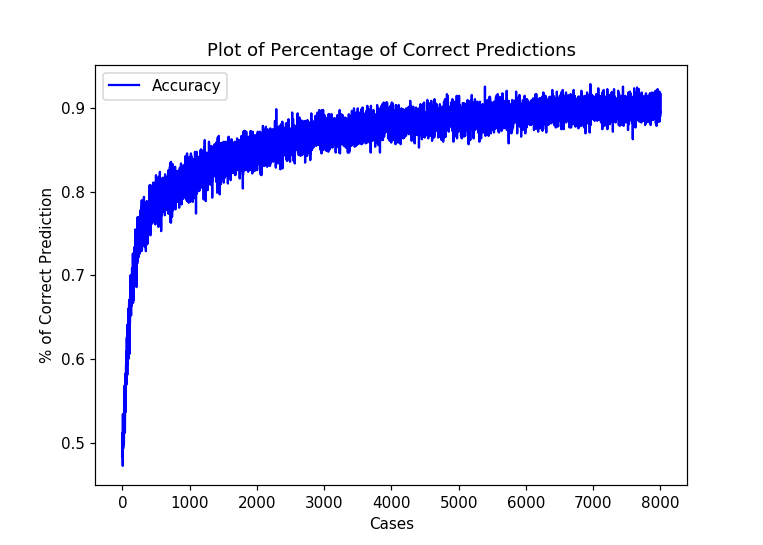

In [107]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),BACRE2,  color='b', label='Accuracy')
plt.ylabel('% of Correct Prediction')
plt.xlabel('Cases')
plt.title('Plot of Percentage of Correct Predictions')
plt.legend()

<IPython.core.display.Javascript object>


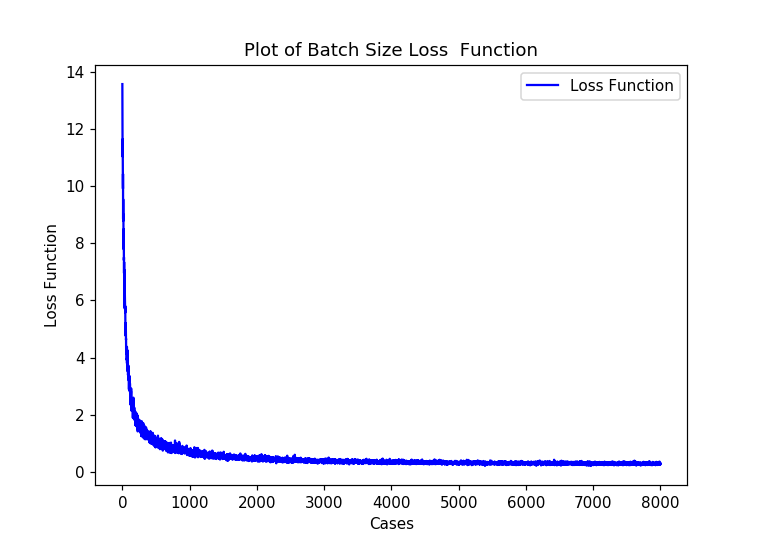

In [108]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),LOSS12,  color='b',  label='Loss Function')
plt.ylabel('Loss Function')
plt.xlabel('Cases')
plt.title('Plot of Batch Size Loss  Function')
plt.legend()

<IPython.core.display.Javascript object>


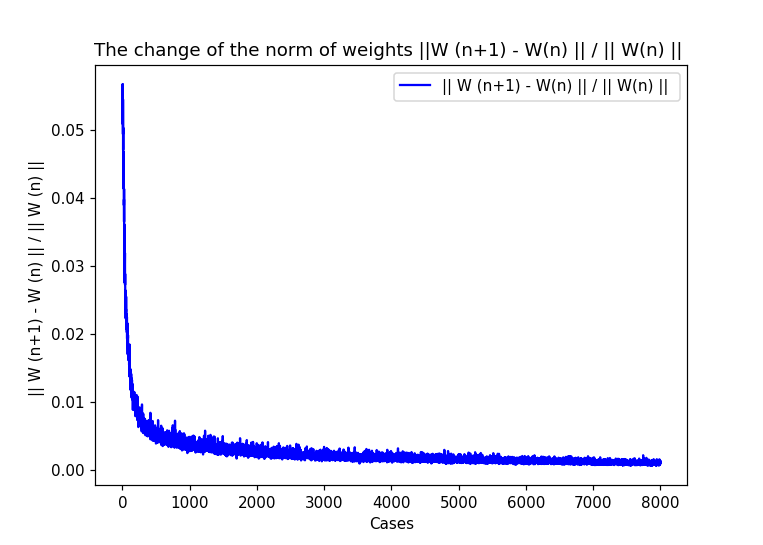

In [109]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),W_n12,  color='b', label='|| W (n+1) - W(n) || / || W(n) || ')
plt.ylabel('|| W (n+1) - W (n) || / || W (n) || ')
plt.xlabel('Cases')
plt.title('The change of the norm of weights ||W (n+1) - W(n) || / || W(n) || ')
plt.legend() 

<IPython.core.display.Javascript object>


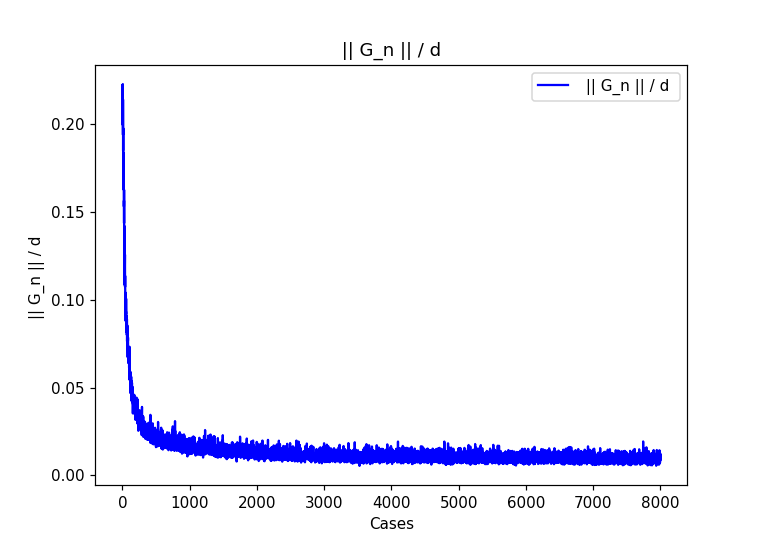

In [110]:
%matplotlib notebook
plt.figure(figsize=(7, 5))
plt.plot(range(8000),G_ave12,  color='b', label=' || G_n || / d ')
plt.ylabel('|| G_n || / d ')
plt.xlabel('Cases')
plt.title(' || G_n || / d ')
plt.legend()

<IPython.core.display.Javascript object>


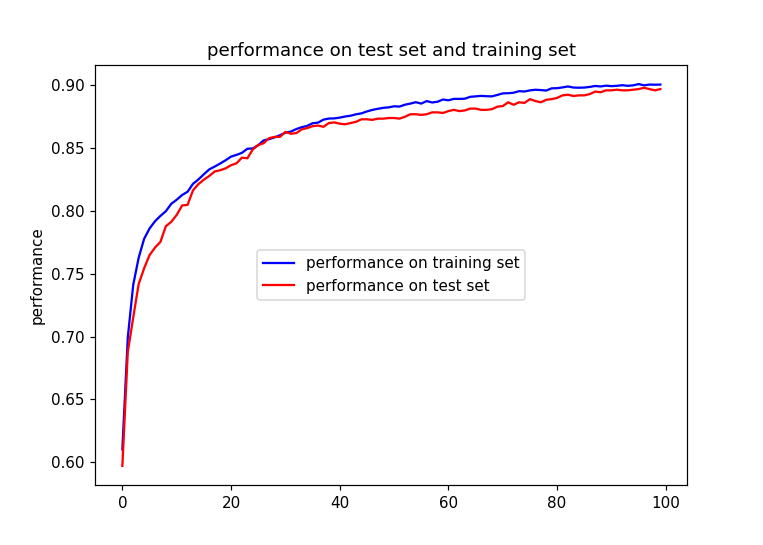

In [111]:
%matplotlib notebook
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot( train_accu12, color='b',label='performance on training set')
ax.plot( test_accu12, color='r',label='performance on test set')
plt.ylabel('performance')
plt.title('performance on test set and training set')
ax.legend(loc='center')
plt.show()

<IPython.core.display.Javascript object>


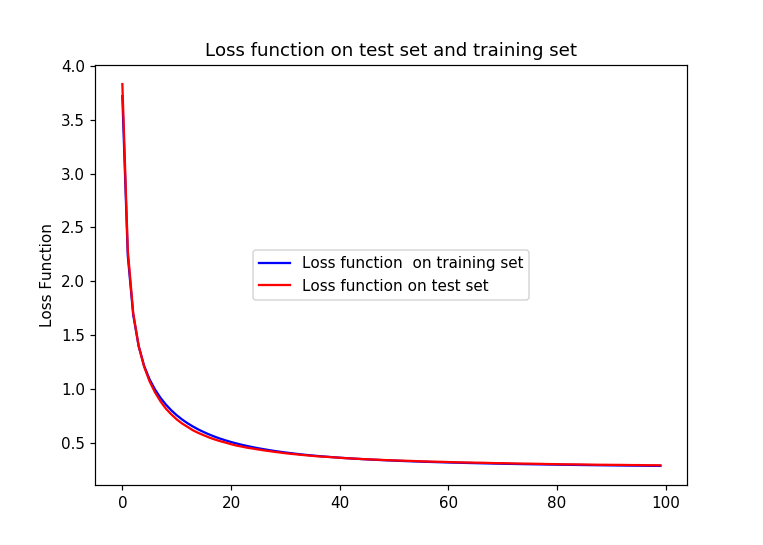

In [112]:
%matplotlib notebook
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot( train_loss2, color='b',label='Loss function  on training set')
ax.plot( test_loss2, color='r',label='Loss function on test set')
plt.ylabel('Loss Function')
plt.title('Loss function on test set and training set')
ax.legend(loc='center')
plt.show()

# PART 5: Impact of Various Learning Options

Effect of Batch Size on Performance

<IPython.core.display.Javascript object>


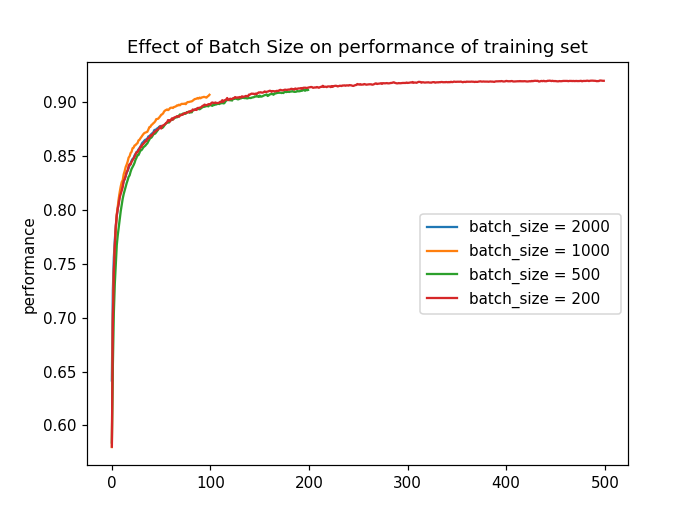

In [113]:
%matplotlib notebook
for b in [2000,1000, 500,  200]:    
    train_accu1b, test_accu1b,train_lossb, test_lossb,axb,ayb,LOSS1b,W_n1b,G_ave1b,Wb1,Wb2,BACREb1,LOSSB31 = fun (b, 1000, 0.01, 34) 
    plt.plot(train_accu1b, label='batch_size = %s '%b)
plt.ylabel('performance')
plt.title('Effect of Batch Size on performance of training set')
plt.legend(loc='center right')
plt.show()   

Effect of Initialization on Performance

<IPython.core.display.Javascript object>


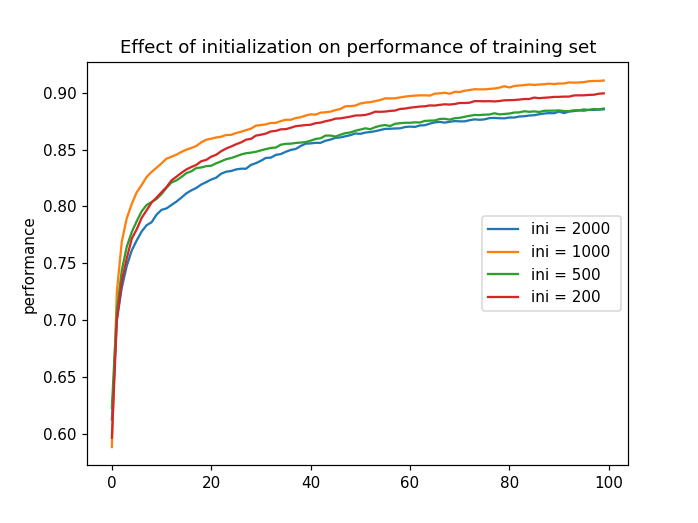

In [115]:
%matplotlib notebook
for b in [2000,1000, 500,  200]:    
    train_accu1b, test_accu1b,train_lossb, test_lossb,axb,ayb,LOSS1b,W_n1b,G_ave1b, Wi1, Wi2,BACREi, LOSSBA3 = fun (1000, b, 0.01, 34)    
    plt.plot(train_accu1b, label='ini = %s '%b)
plt.ylabel('performance')
plt.title('Effect of initialization on performance of training set')
plt.legend(loc='center right')
plt.show()   

Effect of gradient descent step size

<IPython.core.display.Javascript object>


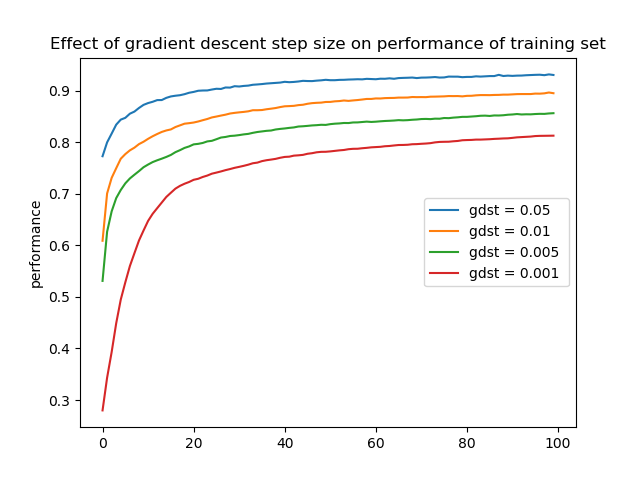

In [282]:
%matplotlib notebook
for b in [0.05,0.01, 0.005, 0.001]:    
    train_accu1b, test_accu1b,train_lossb, test_lossb,axb,ayb,LOSS1b,W_n1b,G_ave1b, Wi3, Wi4, BACREh, LOSSBA4 = fun (1000, 1000, b, 34)    
    plt.plot(train_accu1b, label='gdst = %s '%b)
plt.ylabel('performance')
plt.title('Effect of gradient descent step size on performance of training set')
plt.legend(loc='center right')
plt.show()   

Effect of dimension h of H

<IPython.core.display.Javascript object>


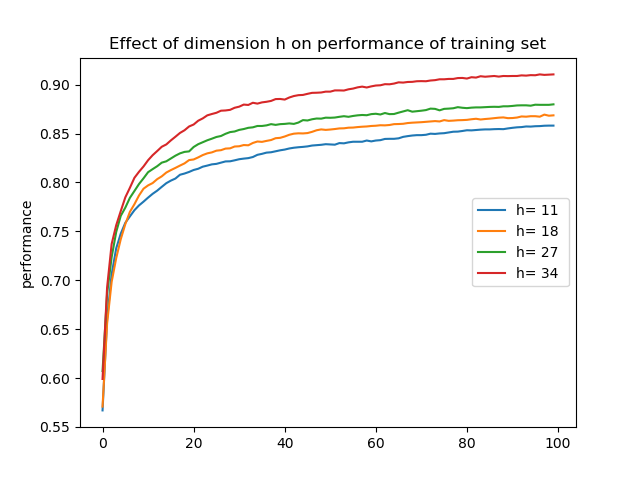

In [283]:
%matplotlib notebook
for b in [11,18,27,34]:    
    train_accu1b, test_accu1b,train_lossb, test_lossb,axb,ayb,LOSS1b,W_n1b,G_ave1b, Wh1, Wh2, BACREbh,LOSSBA5 = fun (1000, 2000, 0.01, b)    
    plt.plot(train_accu1b, label='h= %s '%b)
    plt.ylabel('performance')
    plt.title('Effect of dimension h on performance of training set')
plt.legend(loc='center right')   
plt.show()

# PART 6: Analysis of hidden layer behaviour 

In [284]:
#Global States of the Hidden Layer
hidden_global_states = []
for a in range(10002):
    cc=np.reshape(W34, (15,34))
    dd= np.array([scaled_data.iloc[a,:]])
    ry = pd.DataFrame(np.matmul(dd,cc)+np.matrix(W35))  
    hidden_global_states.append(ry)
global_states=pd.concat(hidden_global_states)

In [285]:
global_states.head(5)#First 5 cases

0         1         2         3         4         5         6   \
0 -2.002860  0.961967  4.181001  1.416856 -2.814030  3.746032  0.531388   
0 -4.074219  5.536793  1.443264  2.285714  2.732781 -2.453837 -2.766361   
0 -6.634599  2.529500  4.381410  1.510009 -3.409478 -1.466038 -1.343636   
0 -1.622281 -3.454943  0.268150  9.713295 -2.949385 -1.692263 -6.831481   
0 -6.067314  2.702971  5.070668  3.287963 -2.283503 -2.103664 -1.052264   

         7         8         9   ...        24        25        26        27  \
0 -0.185582  0.983788  0.991275  ...  2.621704 -2.635824 -5.672270 -1.661483   
0 -4.437343  1.978950 -2.995326  ...  3.202189  5.304730 -1.120039 -5.986855   
0 -4.204399 -2.439524 -5.226885  ...  4.387962  3.007594 -9.461500  0.211949   
0  2.866246  0.972673  3.171867  ...  0.174413 -0.498116 -0.421567 -1.264432   
0 -3.194274 -3.782754  0.115567  ...  4.700536  8.032755 -8.500001 -3.782535   

         28         29        30        31        32        33  
0  0.979343  -1.614339 -1.605077 -3.214880  3.696314  2.556083  
0  1.282818  -9.455031  7.913688 -2.689988  1.113824 -1.389670  
0  2.999345 -11.179748  8.160791 -0.954264  6.491971  4.579298  
0  0.330026   0.036019  6.679822  2.233715  5.569447 -0.751119  
0  3.671706  -6.371430  3.987157  1.283344  9.779572  4.766797  

[5 rows x 34 columns]

In [286]:
#redundancy pruning check
global_states_std=StandardScaler().fit_transform(global_states) 
corr_global_states=np.corrcoef(np.transpose(global_states_std))
a=abs(pd.DataFrame(corr_global_states))
a.head(10) 

0         1         2         3         4         5         6   \
0  1.000000  0.569764  0.288284  0.316506  0.239918  0.187949  0.089524   
1  0.569764  1.000000  0.162831  0.171160  0.011525  0.161641  0.017456   
2  0.288284  0.162831  1.000000  0.285679  0.615649  0.444783  0.079531   
3  0.316506  0.171160  0.285679  1.000000  0.487033  0.577500  0.694568   
4  0.239918  0.011525  0.615649  0.487033  1.000000  0.231659  0.365210   
5  0.187949  0.161641  0.444783  0.577500  0.231659  1.000000  0.276402   
6  0.089524  0.017456  0.079531  0.694568  0.365210  0.276402  1.000000   
7  0.717138  0.621285  0.639377  0.088485  0.343841  0.299962  0.013197   
8  0.383318  0.235194  0.386054  0.214565  0.137727  0.161028  0.369196   
9  0.163567  0.133474  0.114822  0.540818  0.245703  0.039016  0.089463   

         7         8         9   ...        24        25        26        27  \
0  0.717138  0.383318  0.163567  ...  0.460331  0.493908  0.681571  0.547299   
1  0.621285  0.235194  0.133474  ...  0.054275  0.422144  0.370082  0.377025   
2  0.639377  0.386054  0.114822  ...  0.744604  0.446668  0.539414  0.470071   
3  0.088485  0.214565  0.540818  ...  0.111713  0.081373  0.056941  0.073055   
4  0.343841  0.137727  0.245703  ...  0.479066  0.197151  0.479671  0.023827   
5  0.299962  0.161028  0.039016  ...  0.343273  0.345962  0.161043  0.196517   
6  0.013197  0.369196  0.089463  ...  0.189892  0.424884  0.104022  0.126512   
7  1.000000  0.513608  0.261728  ...  0.580314  0.609214  0.444745  0.646358   
8  0.513608  1.000000  0.029007  ...  0.039043  0.197150  0.118985  0.206311   
9  0.261728  0.029007  1.000000  ...  0.229102  0.210440  0.004713  0.179186   

         28        29        30        31        32        33  
0  0.397227  0.341587  0.604363  0.080606  0.140021  0.759957  
1  0.404255  0.119278  0.248233  0.122639  0.296418  0.456181  
2  0.085354  0.460675  0.452309  0.010877  0.621628  0.552184  
3  0.197938  0.101439  0.237970  0.204527  0.166383  0.027414  
4  0.165788  0.037300  0.432865  0.414674  0.493455  0.650054  
5  0.087183  0.444979  0.539109  0.121639  0.558529  0.045540  
6  0.132549  0.051096  0.371079  0.478139  0.134118  0.033325  
7  0.272050  0.611024  0.746643  0.112404  0.383917  0.605779  
8  0.362264  0.266772  0.213088  0.283556  0.381602  0.206236  
9  0.056181  0.640249  0.310386  0.044360  0.275846  0.133282  

[10 rows x 34 columns]

[3.42329015e-01 1.36272545e-01 1.23144288e-01 9.62042151e-02
 7.19280859e-02 6.11173004e-02 4.79189191e-02 3.86379613e-02
 3.10298298e-02 1.72454967e-02 1.38519450e-02 7.98067824e-03
 6.18849645e-03 4.78018773e-03 1.37103596e-03 7.63398165e-33
 3.45048295e-33 2.54155901e-33 2.25505339e-33 2.10991356e-33
 2.07107152e-33 2.03439844e-33 1.77123489e-33 1.66044393e-33
 1.49268133e-33 1.48846617e-33 1.48846617e-33 1.48846617e-33
 1.48846617e-33 1.48846617e-33 1.48846617e-33 1.48846617e-33
 1.48846617e-33 1.48846617e-33]


<IPython.core.display.Javascript object>


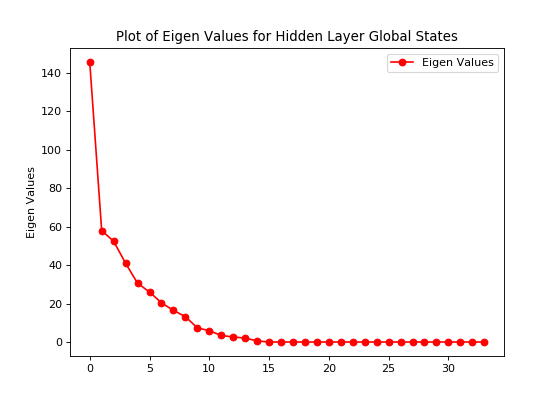

In [377]:
%matplotlib notebook
pca2l = PCA(n_components=34)
pca2l.fit(global_states)
print((pca2l.explained_variance_ratio_))
plt.figure(figsize=(7, 5))
plt.figure(1)
Le=sorted(pca2l.explained_variance_,reverse=True, )
plt.plot(Le,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('')
plt.title('Plot of Eigen Values for Hidden Layer Global States')
plt.legend()

<IPython.core.display.Javascript object>


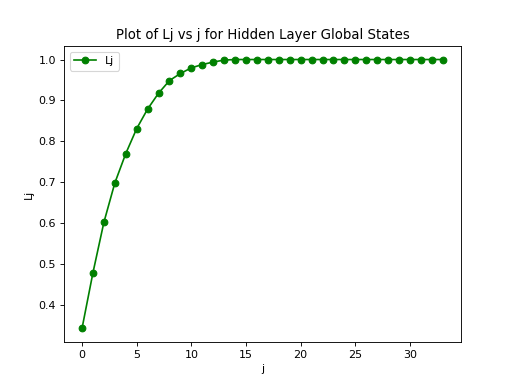

In [376]:
dg=pca2l.explained_variance_ratio_ 
da1=[]
for i in range(34):    
    if i ==0:
        Ri = dg[i]
    else:
        Ri+=dg[i]        
    da1.append(Ri)
%matplotlib notebook
plt.plot(da1,  marker='o', label='Lj', color='g')
plt.ylabel('Lj')
plt.xlabel('j')
plt.title('Plot of Lj vs j for Hidden Layer Global States')
plt.legend()

In [289]:
#Smallest Number uB
bb1=pca2l.explained_variance_
compare1bb=sum(bb1)*0.95
s1bb=0
count1bb=0
for i in bb1:
    count1bb=count1bb+1
    s1bb=s1bb+i
   # print(i)
    if s1bb>compare1bb:
       # print(count1)
        break
    
Ub=count1bb
print("The smallest number Ub is: " + str(Ub))

The smallest number Ub is: 10


In [290]:
#Get the classes for the global states
ff=pd.concat([(global_states.reset_index(drop=True)),y_output], axis=1)
D111= ff[ff['Class']==1].iloc[:,0:34]
D211= ff[ff['Class']==2].iloc[:,0:34]
D311= ff[ff['Class']==3].iloc[:,0:34]
print ("Class 1: "+ str(D111.shape[0]),"Class 2: "+ str(D211.shape[0]), "Class 3: "+str(D311.shape[0]) )

Class 1: 3334 Class 2: 3334 Class 3: 3334


In [291]:
# PCA Analysis for Global states of the hidden layer
pca2l1 = PCA(n_components=3)
pca2l1.fit(global_states)
result11=pd.DataFrame(pca2l1.transform(D111), columns=['PCA%i' % i for i in range(3)], index=D111.index)
result12=pd.DataFrame(pca2l1.transform(D211), columns=['PCA%i' % i for i in range(3)], index=D211.index)
result13=pd.DataFrame(pca2l1.transform(D311), columns=['PCA%i' % i for i in range(3)], index=D311.index)
print(result12)

           PCA0       PCA1       PCA2
1    -17.220172   5.818170  15.391655
2    -28.208133  -7.349290  -8.395854
4    -25.491351  -3.047852   0.157710
6    -14.543473   1.276715  11.309739
7    -14.329854 -13.068049  -6.630295
...         ...        ...        ...
9992 -10.751792  -4.809884  10.353612
9993  -2.956948   1.528698  -2.603284
9996  -8.485723 -10.305815  -2.364113
9997 -17.981210   3.761675   0.841383
9998 -26.612454  -4.768697 -12.311448

[3334 rows x 3 columns]


<IPython.core.display.Javascript object>


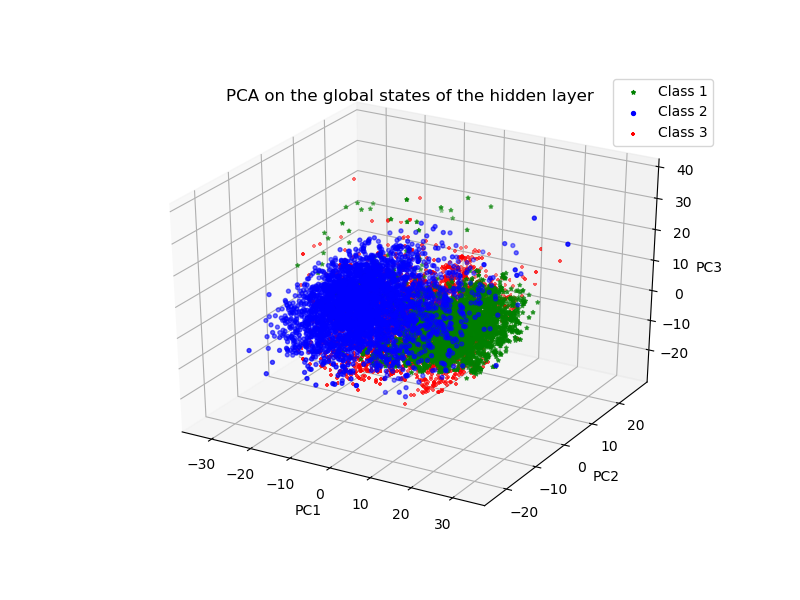

Text(0.5, 0.92, 'PCA on the global states of the hidden layer')

In [292]:
# Plot of Principal Components
%matplotlib notebook
fig = plt.figure(figsize=(8, 6))
axv = fig.add_subplot(1,1,1, projection='3d') 
axv.scatter(result11['PCA0'], result11['PCA1'], result11['PCA2'],s=8,marker='*', color='g', label='Class 1')
axv.scatter(result12['PCA0'], result12['PCA1'], result12['PCA2'],s=8,marker='o', color = 'b', label='Class 2')
axv.scatter(result13['PCA0'], result13['PCA1'], result13['PCA2'],s=8, marker='+', color='r', label='Class 3')
axv.set_xlabel("PC1")
axv.set_ylabel("PC2")
axv.set_zlabel("PC3")
axv.legend (loc='best')
axv.set_title("PCA on the global states of the hidden layer")

In [293]:
average_D111= (D111.sum(axis=0))/10002 #Class 1
average_D211= (D211.sum(axis=0))/10002 #Class 2
average_D311=(D311.sum(axis=0))/10002 #Class 3
average_All = (global_states.sum(axis=0))/10002 #Class 3

Histogram of Class 1 Average Activity 

<IPython.core.display.Javascript object>


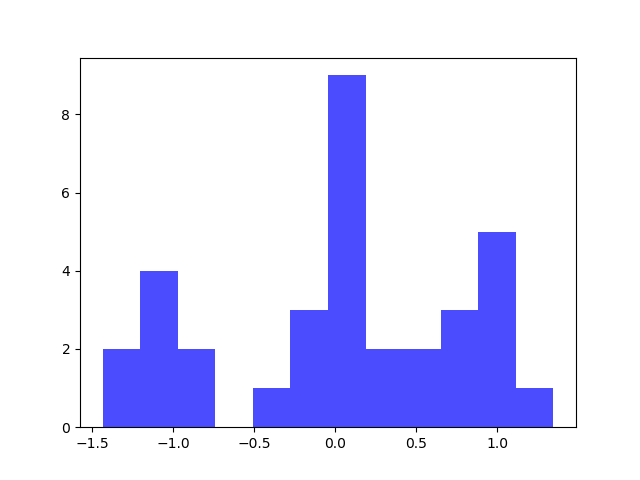

In [303]:
%matplotlib notebook
n, bins, patches = plt.hist(average_D111, bins=12, color='b',alpha=0.7)
plt.show()

Histogram of Class 2 Average Activity 

<IPython.core.display.Javascript object>


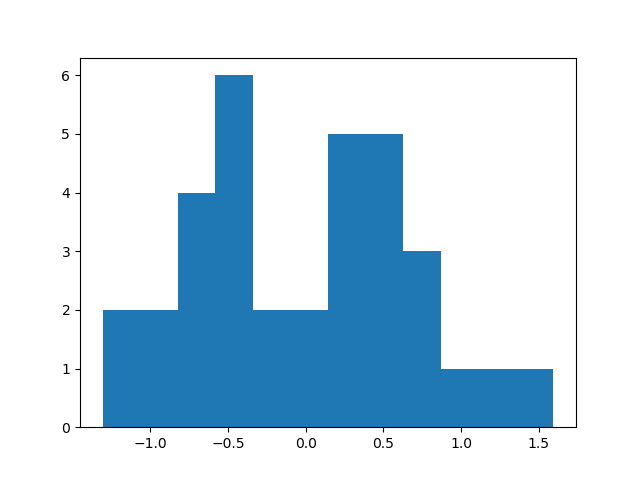

In [304]:
%matplotlib notebook
n, bins, patches = plt.hist(average_D211, bins=12)
plt.show()

Histogram of Class 3 Average Activity 

<IPython.core.display.Javascript object>


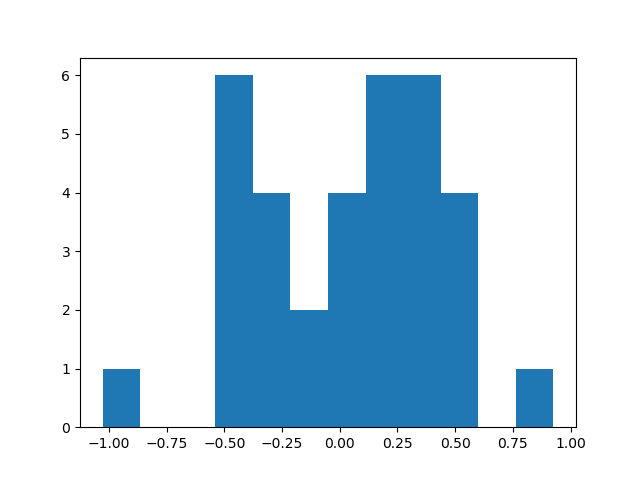

In [305]:
%matplotlib notebook
n, bins, patches = plt.hist(average_D311, bins=12)
plt.show()

Histogram of Global Average Activity 

<IPython.core.display.Javascript object>


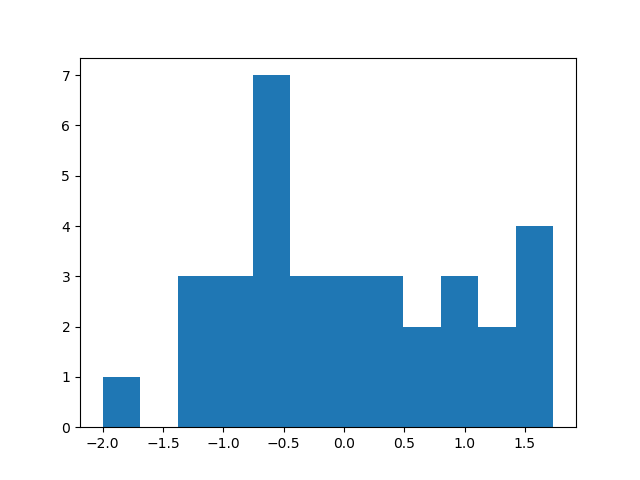

In [306]:
%matplotlib notebook
n, bins, patches = plt.hist(average_All, bins=12)
plt.show()

Plot of hidden neuron profile activity for each class (DIFFERENTIATION)

<IPython.core.display.Javascript object>


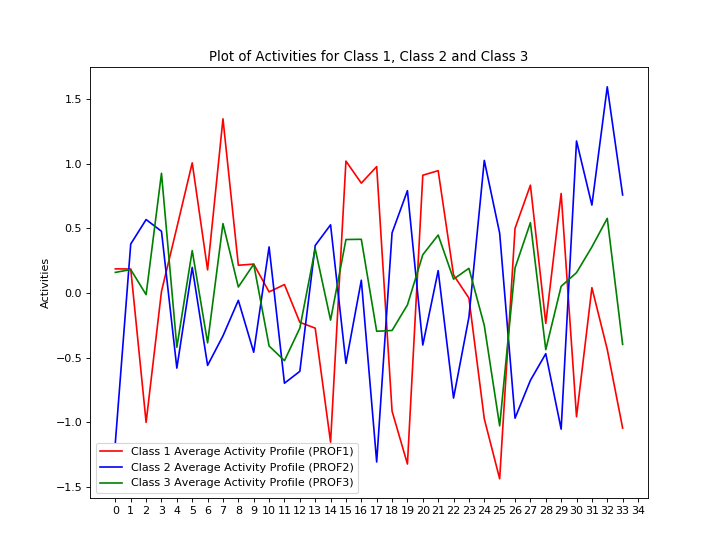

In [380]:
%matplotlib notebook
plt.figure(figsize=(9, 7))
plt.plot(average_D111,color='r',  label='Class 1 Average Activity Profile (PROF1)')
plt.plot(average_D211,color='b',  label='Class 2 Average Activity Profile (PROF2)')
plt.plot(average_D311,color='g',  label='Class 3 Average Activity Profile (PROF3)')
plt.ylabel('Activities')
plt.xlabel('')
plt.xticks(np.arange(0, 34+1, 1.0))
plt.title('Plot of Activities for Class 1, Class 2 and Class 3')
plt.legend(loc='lower left')

Plot of hidden neuron profile activity for class 1 and class 2

<IPython.core.display.Javascript object>


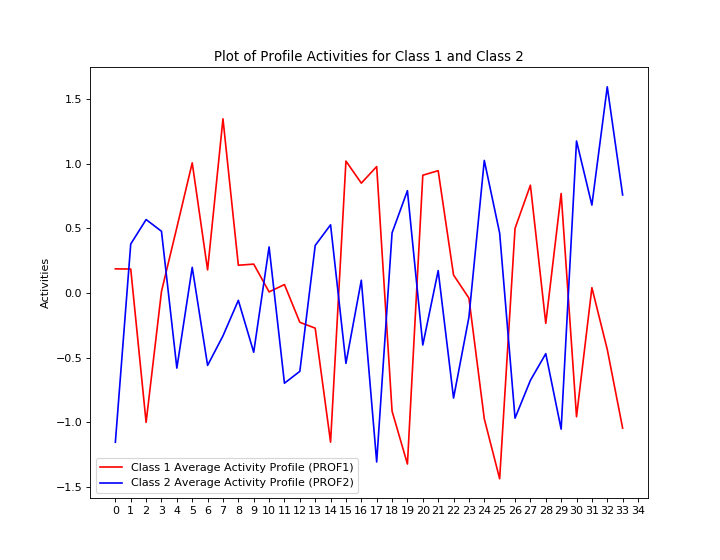

In [381]:
%matplotlib notebook
plt.figure(figsize=(9, 7))
plt.plot(average_D111,color='r',  label='Class 1 Average Activity Profile (PROF1)')
plt.plot(average_D211,color='b',  label='Class 2 Average Activity Profile (PROF2)')
plt.ylabel('Activities')
plt.xlabel('')
plt.xticks(np.arange(0, 34+1, 1.0))
plt.title('Plot of Profile Activities for Class 1 and Class 2')
plt.legend(loc='lower left')

Plot of hidden neuron profile activity for class 1 and class 3

<IPython.core.display.Javascript object>


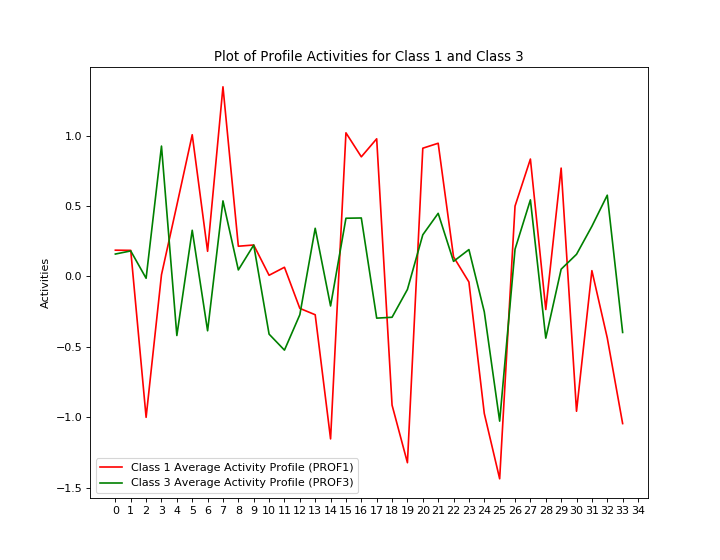

In [382]:
%matplotlib notebook
plt.figure(figsize=(9, 7))
plt.plot(average_D111,color='r',  label='Class 1 Average Activity Profile (PROF1)')
plt.plot(average_D311,color='g',  label='Class 3 Average Activity Profile (PROF3)')
plt.ylabel('Activities')
plt.xlabel('')
plt.xticks(np.arange(0, 34+1, 1.0))
plt.title('Plot of Profile Activities for Class 1 and Class 3')
plt.legend(loc='lower left')

Plot of hidden neuron profile activity for class 2 and class 3

<IPython.core.display.Javascript object>


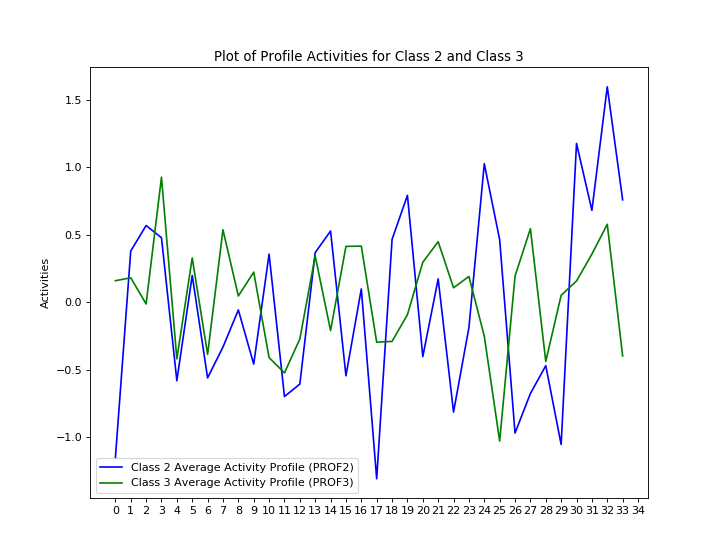

In [383]:
%matplotlib notebook
plt.figure(figsize=(9, 7))
plt.plot(average_D211,color='b',  label='Class 2 Average Activity Profile (PROF2)')
plt.plot(average_D311,color='g',  label='Class 3 Average Activity Profile (PROF3)')
plt.ylabel('Activities')
plt.xlabel('')
plt.xticks(np.arange(0, 34+1, 1.0))
plt.title('Plot of Profile Activities for Class 2 and Class 3')
plt.legend(loc='lower left')